In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']=500

%matplotlib inline
sns.set_theme(style='darkgrid' , palette='rainbow')

import warnings
warnings.filterwarnings('ignore')

# Q1→→→Ans→→→Company_Dataset

In [2]:
com = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\15_Random_Forest\Company_Data (1).csv")
com

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
com.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [4]:
com.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
com['Sales'] = np.where(com['Sales'] >= 5 , 'yes' , 'no')
com

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     yes        138      73           11         276    120       Bad   42   
1     yes        111      48           16         260     83      Good   65   
2     yes        113      35           10         269     80    Medium   59   
3     yes        117     100            4         466     97    Medium   55   
4      no        141      64            3         340    128       Bad   38   
..    ...        ...     ...          ...         ...    ...       ...  ...   
395   yes        138     108           17         203    128      Good   33   
396   yes        139      23            3          37    120    Medium   55   
397   yes        162      26           12         368    159    Medium   40   
398   yes        100      79            7         284     95       Bad   50   
399   yes        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lb = LabelEncoder()

In [8]:
def encoding (dataframe , *columns):
    for column in columns:
        dataframe[column] = lb.fit_transform(dataframe[column])

In [9]:
encoding(com  , 'ShelveLoc' , 'Urban' , 'US')
com

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     yes        138      73           11         276    120          0   42   
1     yes        111      48           16         260     83          1   65   
2     yes        113      35           10         269     80          2   59   
3     yes        117     100            4         466     97          2   55   
4      no        141      64            3         340    128          0   38   
..    ...        ...     ...          ...         ...    ...        ...  ...   
395   yes        138     108           17         203    128          1   33   
396   yes        139      23            3          37    120          2   55   
397   yes        162      26           12         368    159          2   40   
398   yes        100      79            7         284     95          0   50   
399   yes        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

<Axes: xlabel='Sales', ylabel='count'>

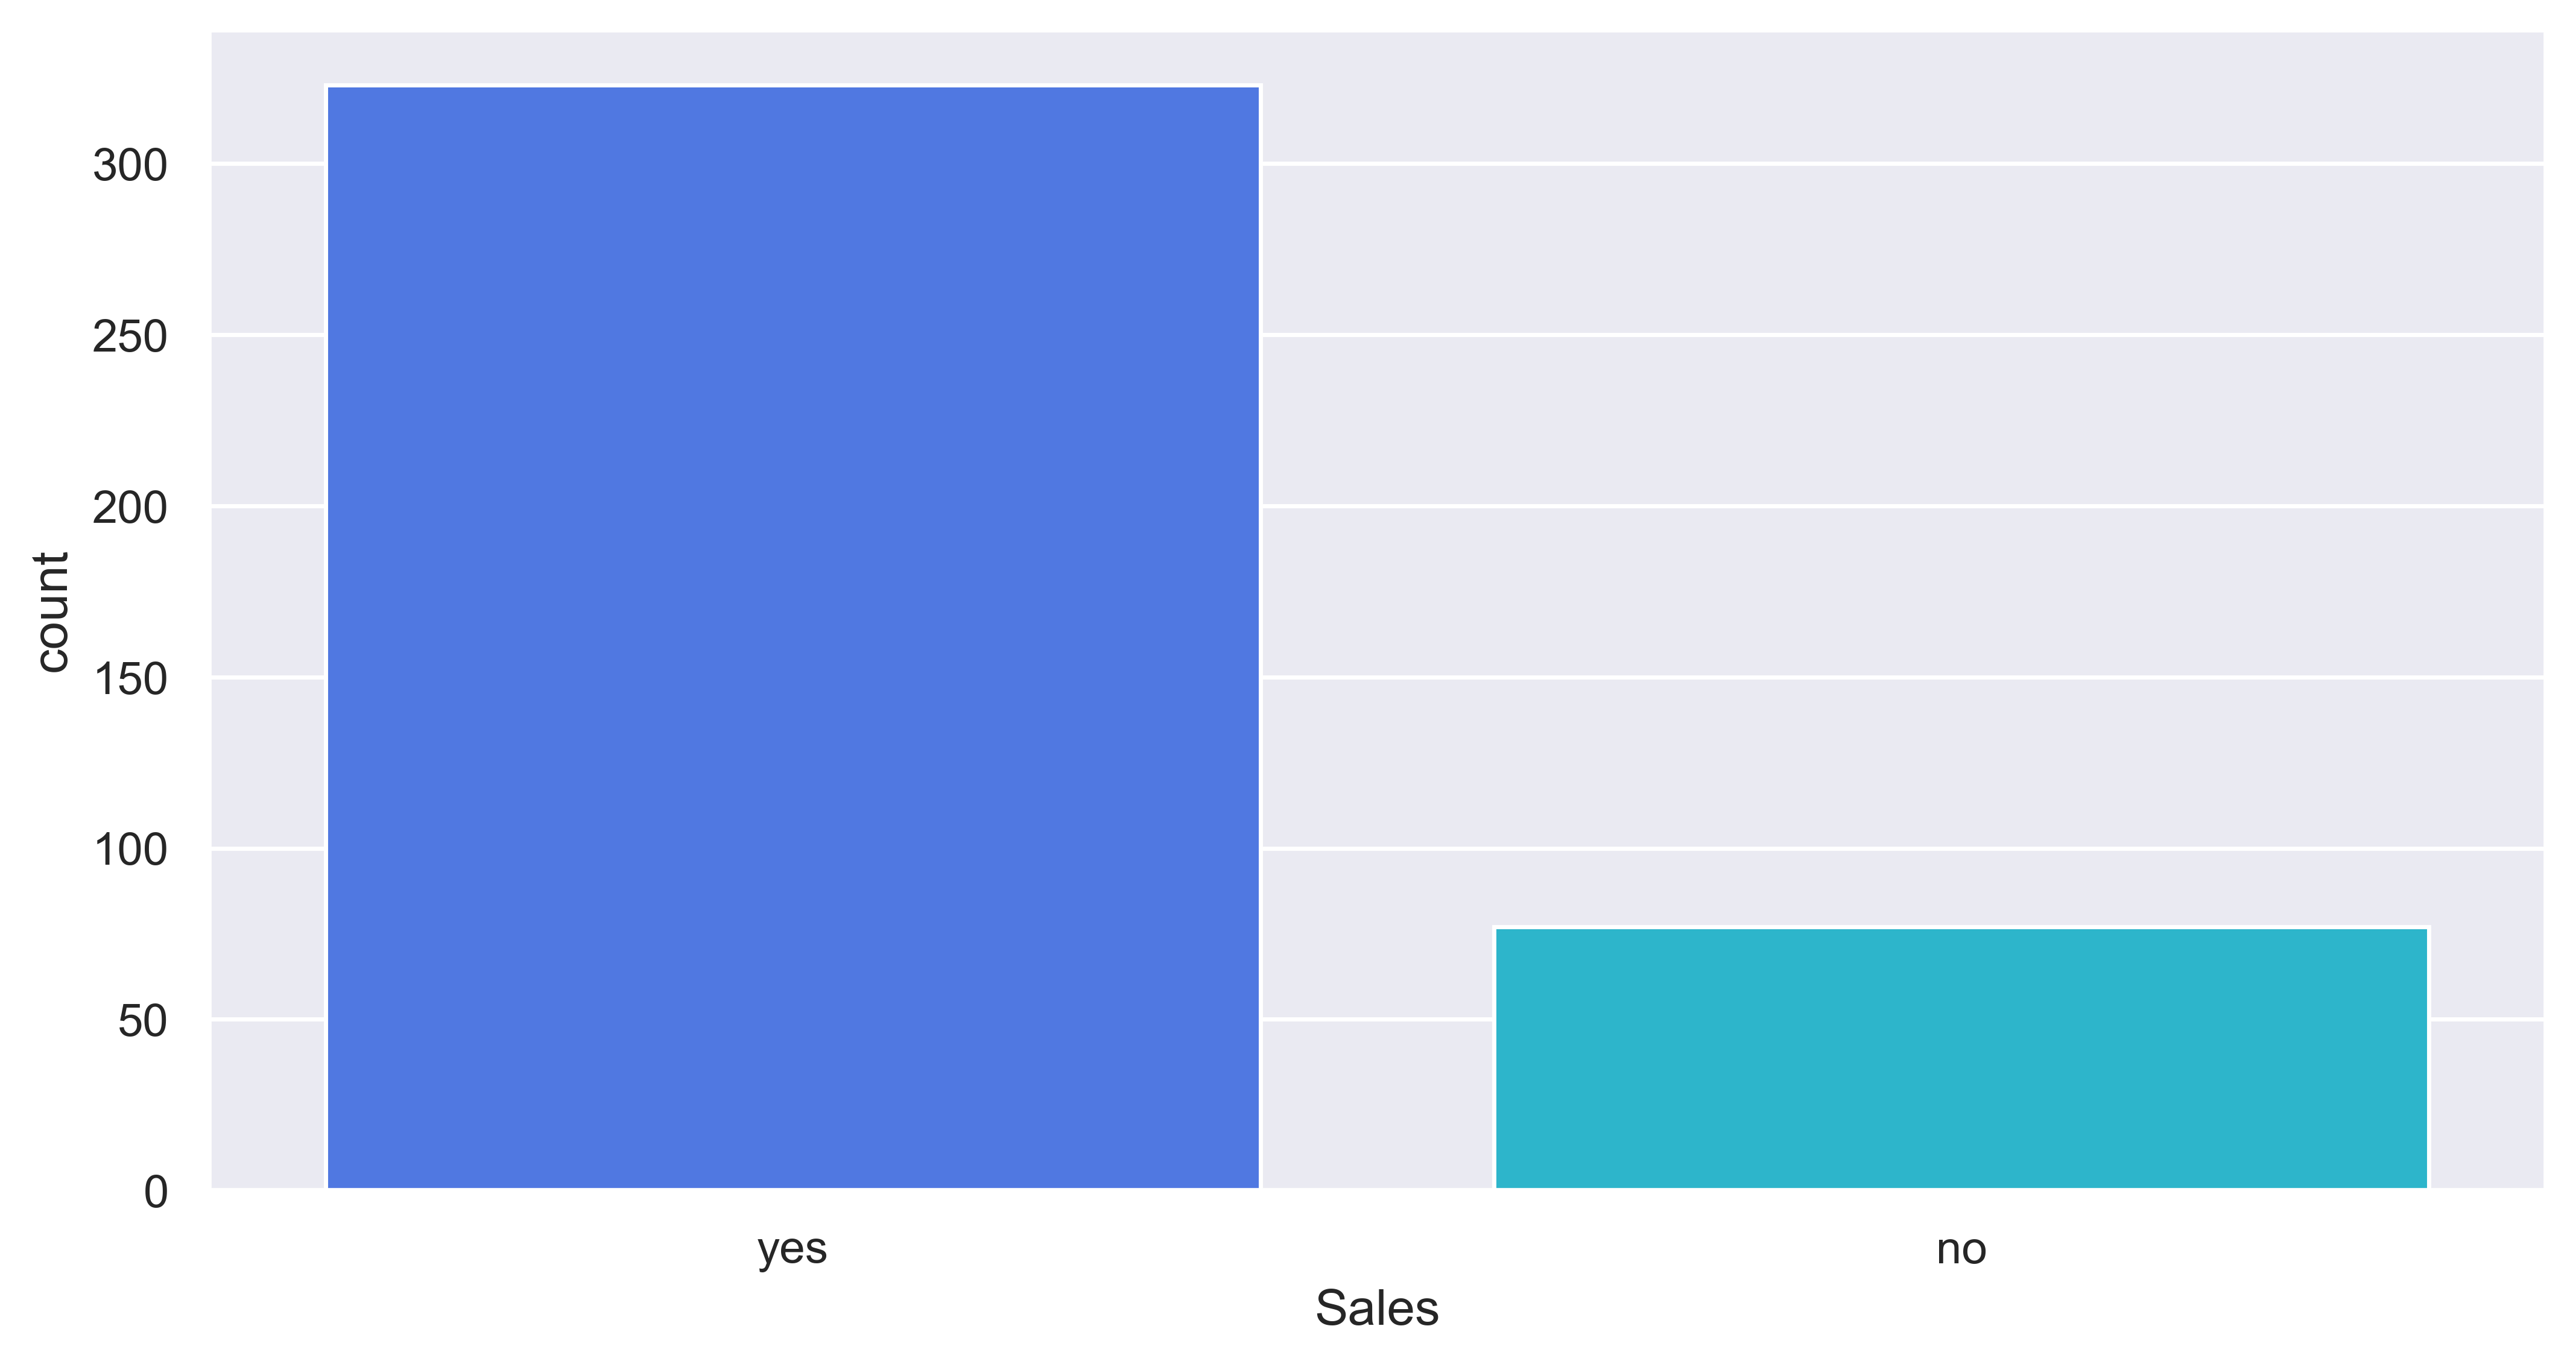

In [10]:
sns.countplot(x = com['Sales'])

In [11]:
x = com.iloc[: , 1 :]
y = com['Sales']
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [12]:
y

0      yes
1      yes
2      yes
3      yes
4       no
      ... 
395    yes
396    yes
397    yes
398    yes
399    yes
Name: Sales, Length: 400, dtype: object

In [13]:
xtrain , xtest , ytrain , ytest = train_test_split( x , y , test_size= 0.2 , random_state= 42)
xtrain

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
3          117     100            4         466     97          2   55   
18         110     110            0         408     68          1   46   
202        121      78            4         413    130          0   46   
250        137     105           10         435    156          1   72   
274        135      93            2          67    119          2   34   
..         ...     ...          ...         ...    ...        ...  ...   
71         148      51           16         148    150          2   58   
106        102      33            0         217    139          2   70   
270        119      26            0         284     89          1   26   
348        132     102           20         459    107          1   49   
102        113      22            0          57     97          2   65   

     Education  Urban  US  
3           14      1   1  
18          17      0   1  
202         10      0   1  
250         14      1   1  
274         11      1   1  
..         ...    ...  ..  
71          17      0   1  
106         18      0   0  
270         10      1   0  
348         11      1   1  
102         16      0   0  

[320 rows x 10 columns]

In [14]:
ytrain

3      yes
18     yes
202     no
250    yes
274    yes
      ... 
71     yes
106     no
270    yes
348    yes
102    yes
Name: Sales, Length: 320, dtype: object

In [15]:
rf = RandomForestClassifier() 
rf

RandomForestClassifier()

In [16]:
rf.fit(xtrain , ytrain)
ypred = rf.predict(xtest)
ypred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [17]:
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

          no       0.67      0.29      0.40        14
         yes       0.86      0.97      0.91        66

    accuracy                           0.85        80
   macro avg       0.77      0.63      0.66        80
weighted avg       0.83      0.85      0.82        80



In [60]:
para = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'max_depth' :list(range(0,13,2))
}

In [61]:
grid = GridSearchCV(estimator=RandomForestClassifier() , param_grid=para , verbose=1)
grid

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 2, 4, 6, 8, 10, 12]},
             verbose=1)

In [62]:
grid.fit(xtrain , ytrain)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 2, 4, 6, 8, 10, 12]},
             verbose=1)

In [63]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [64]:
rf = RandomForestClassifier(criterion='gini' , max_depth=8  )
rf

RandomForestClassifier(max_depth=8)

In [65]:
rf.fit(xtrain , ytrain)
ypred = rf.predict(xtest)
ypred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [66]:
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

          no       1.00      0.36      0.53        14
         yes       0.88      1.00      0.94        66

    accuracy                           0.89        80
   macro avg       0.94      0.68      0.73        80
weighted avg       0.90      0.89      0.86        80



- Accuracy increased by 2 - 3% by hyperparameter Tuning

In [25]:
len(rf.estimators_)

100

In [26]:
rf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       random_state=2038882644)

In [27]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

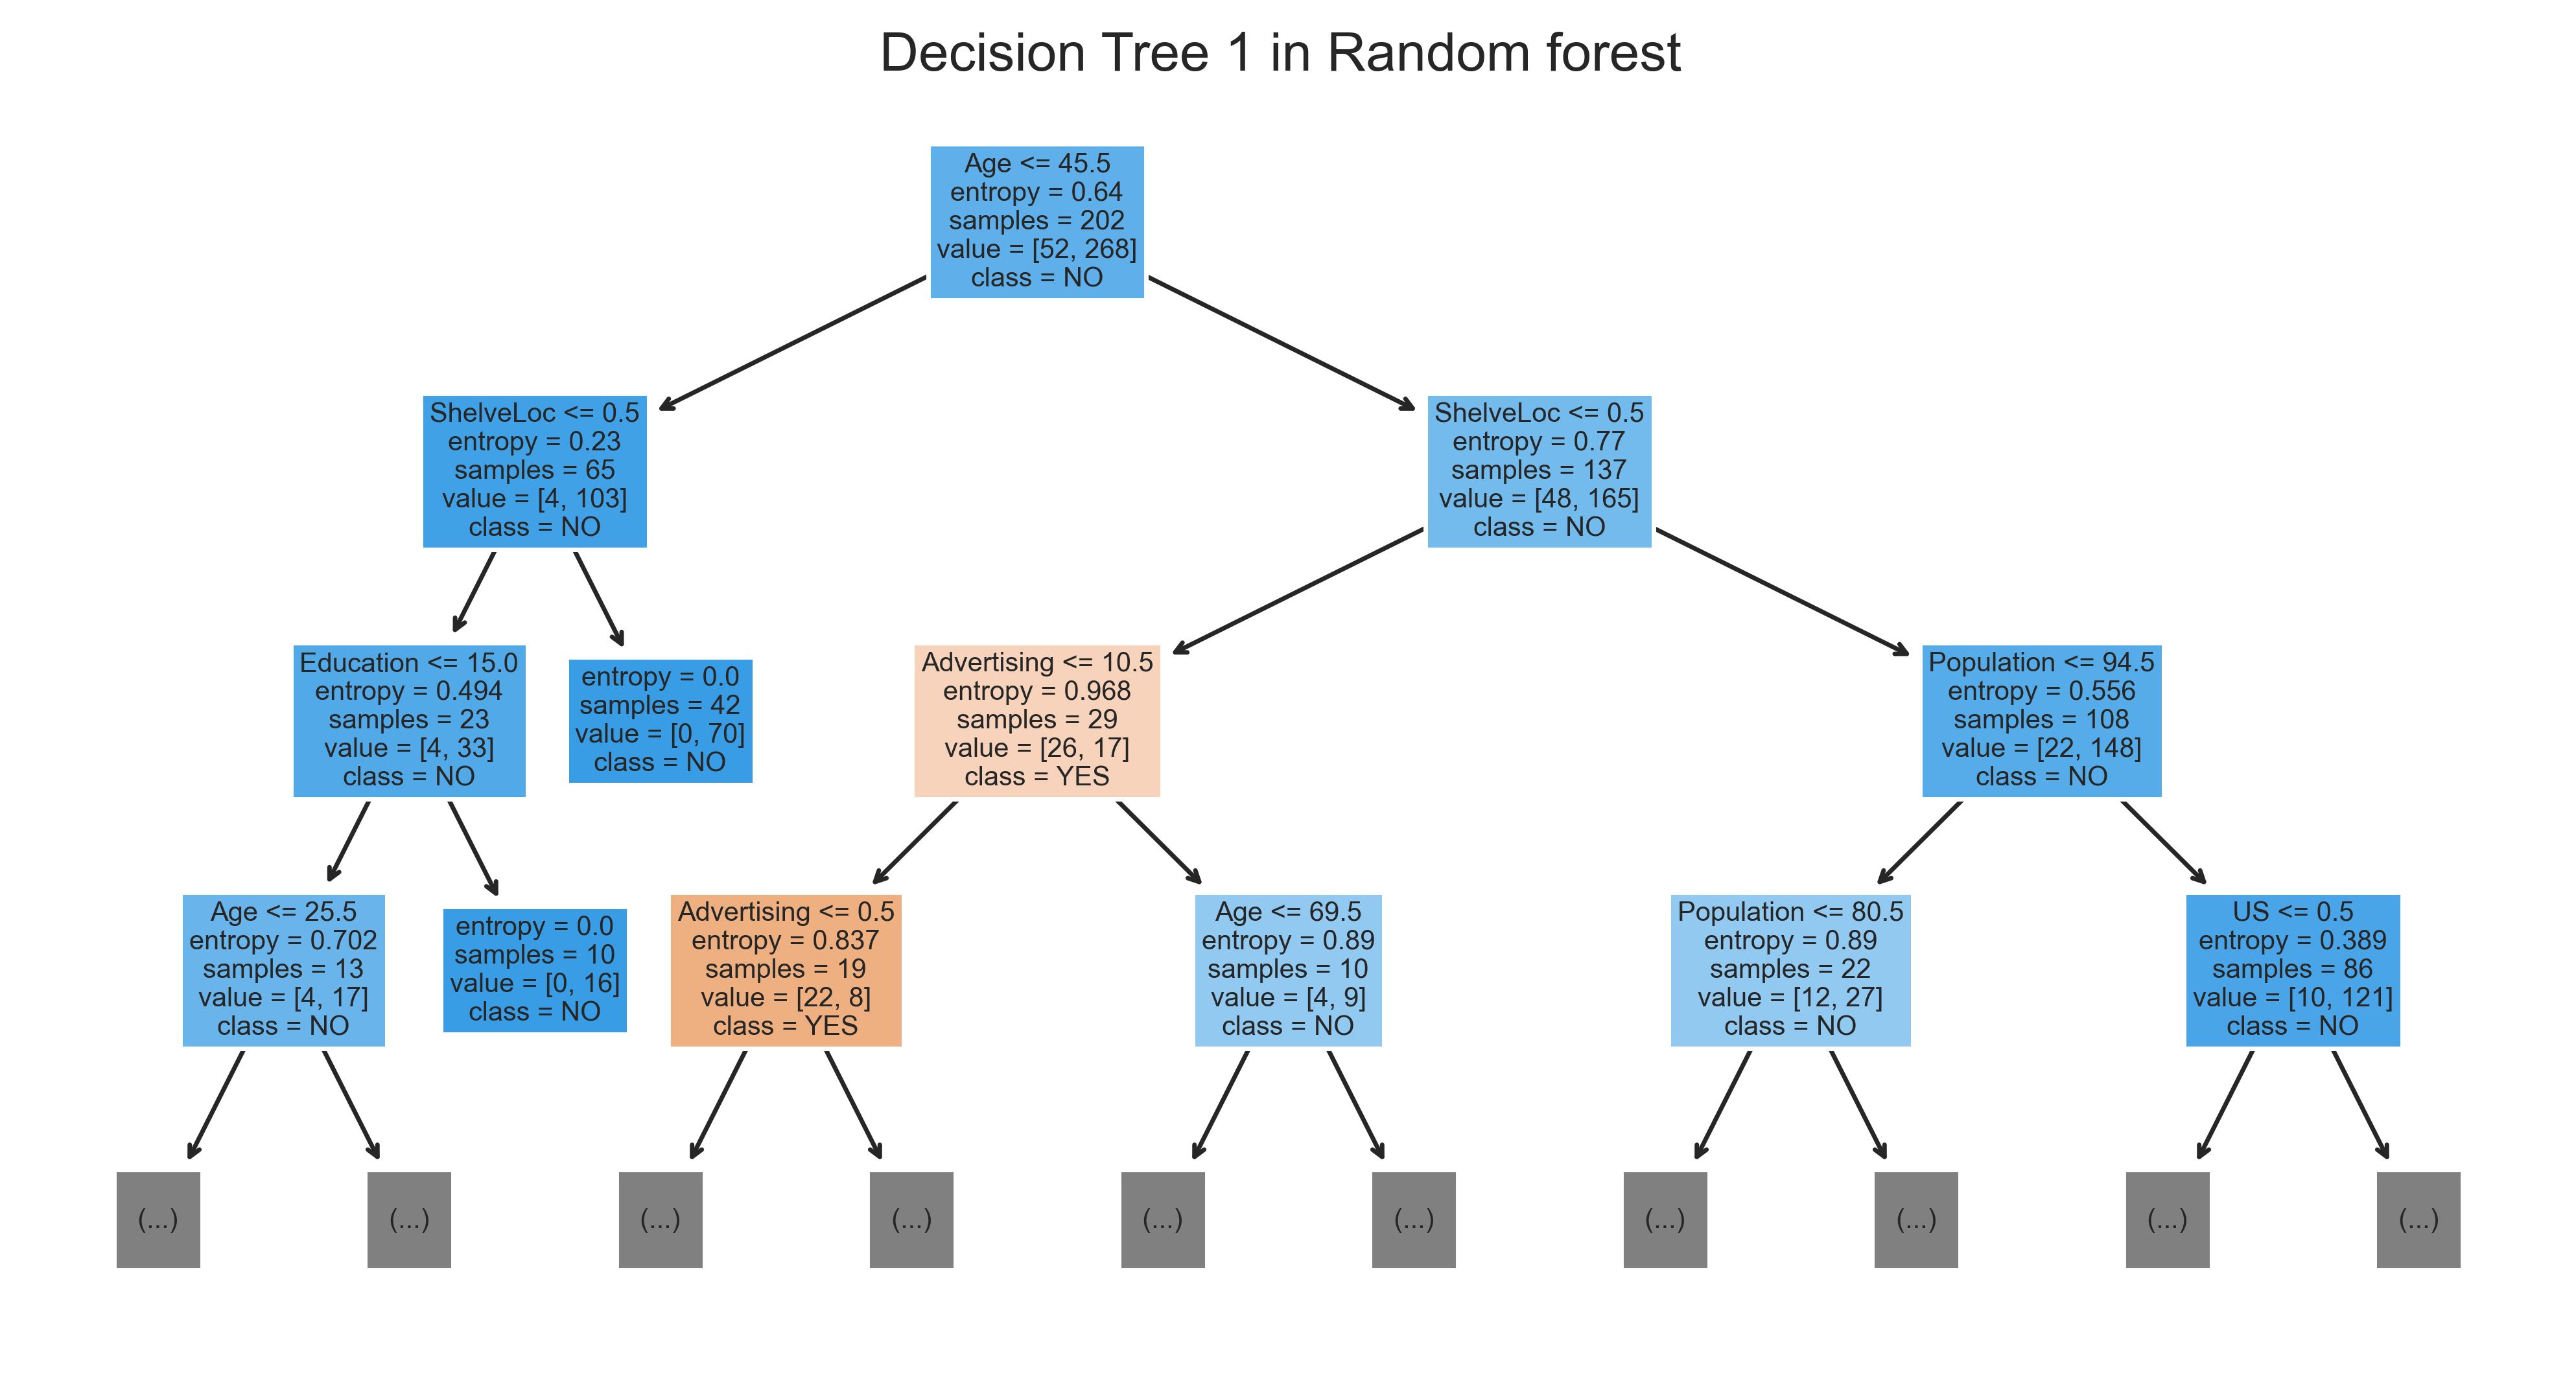

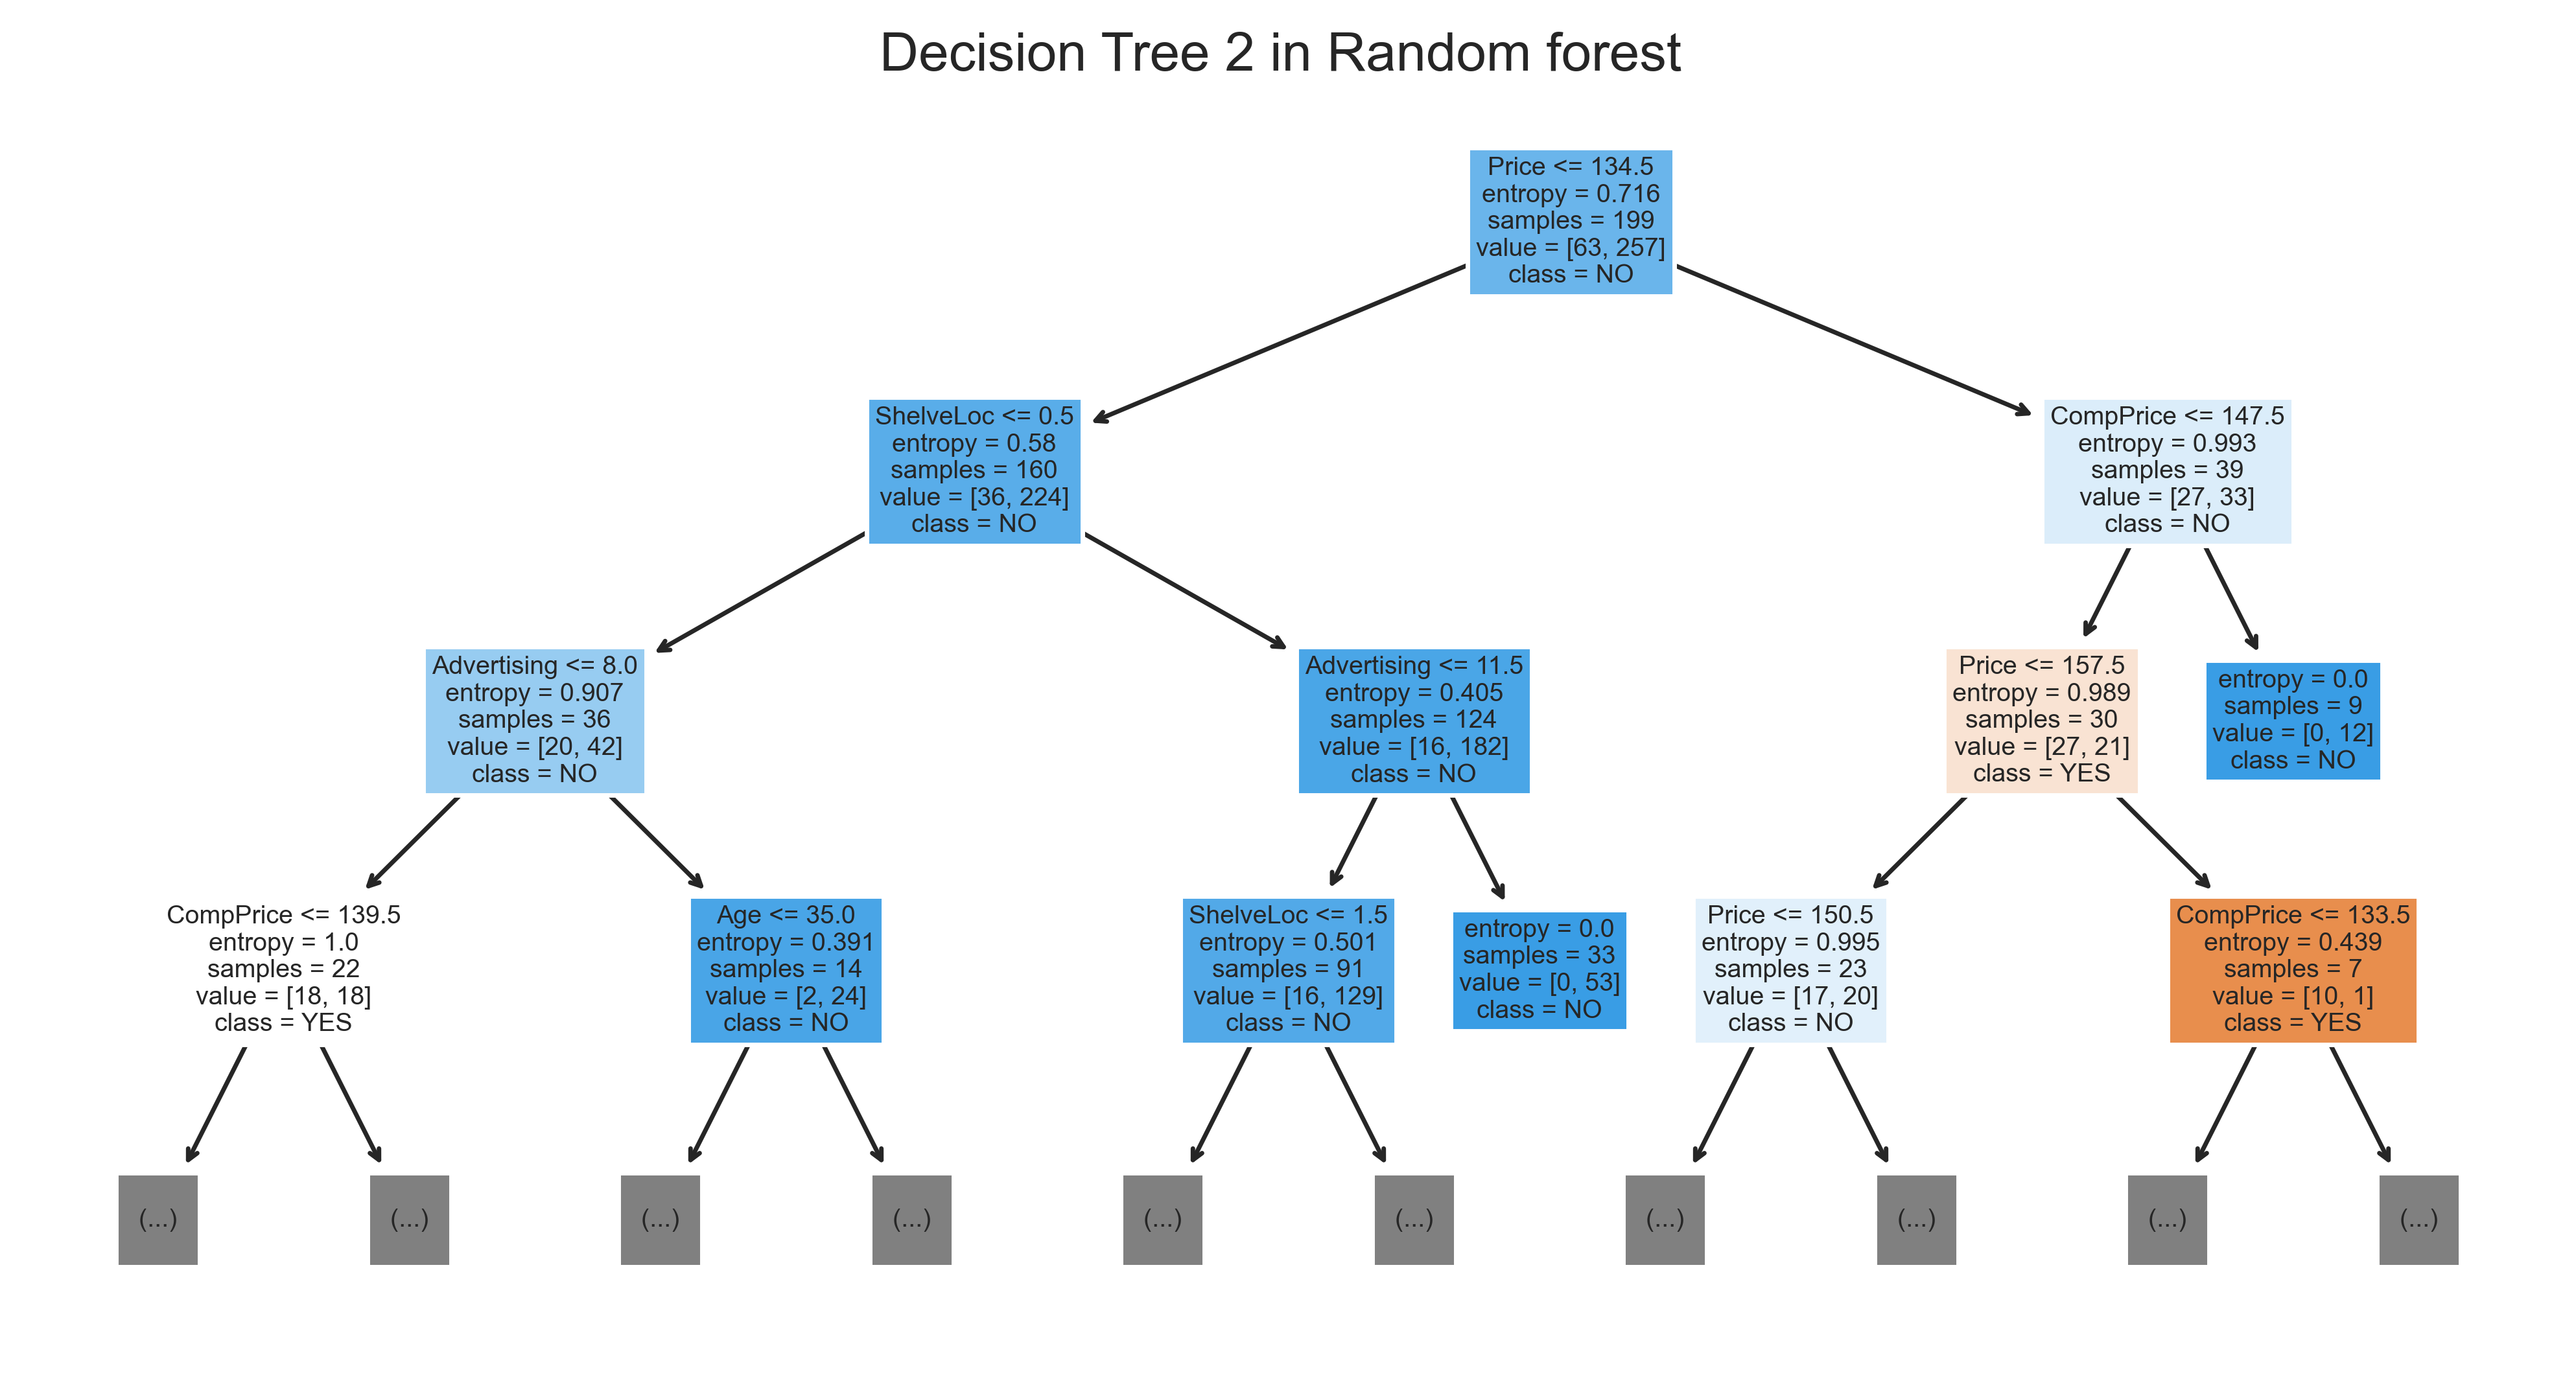

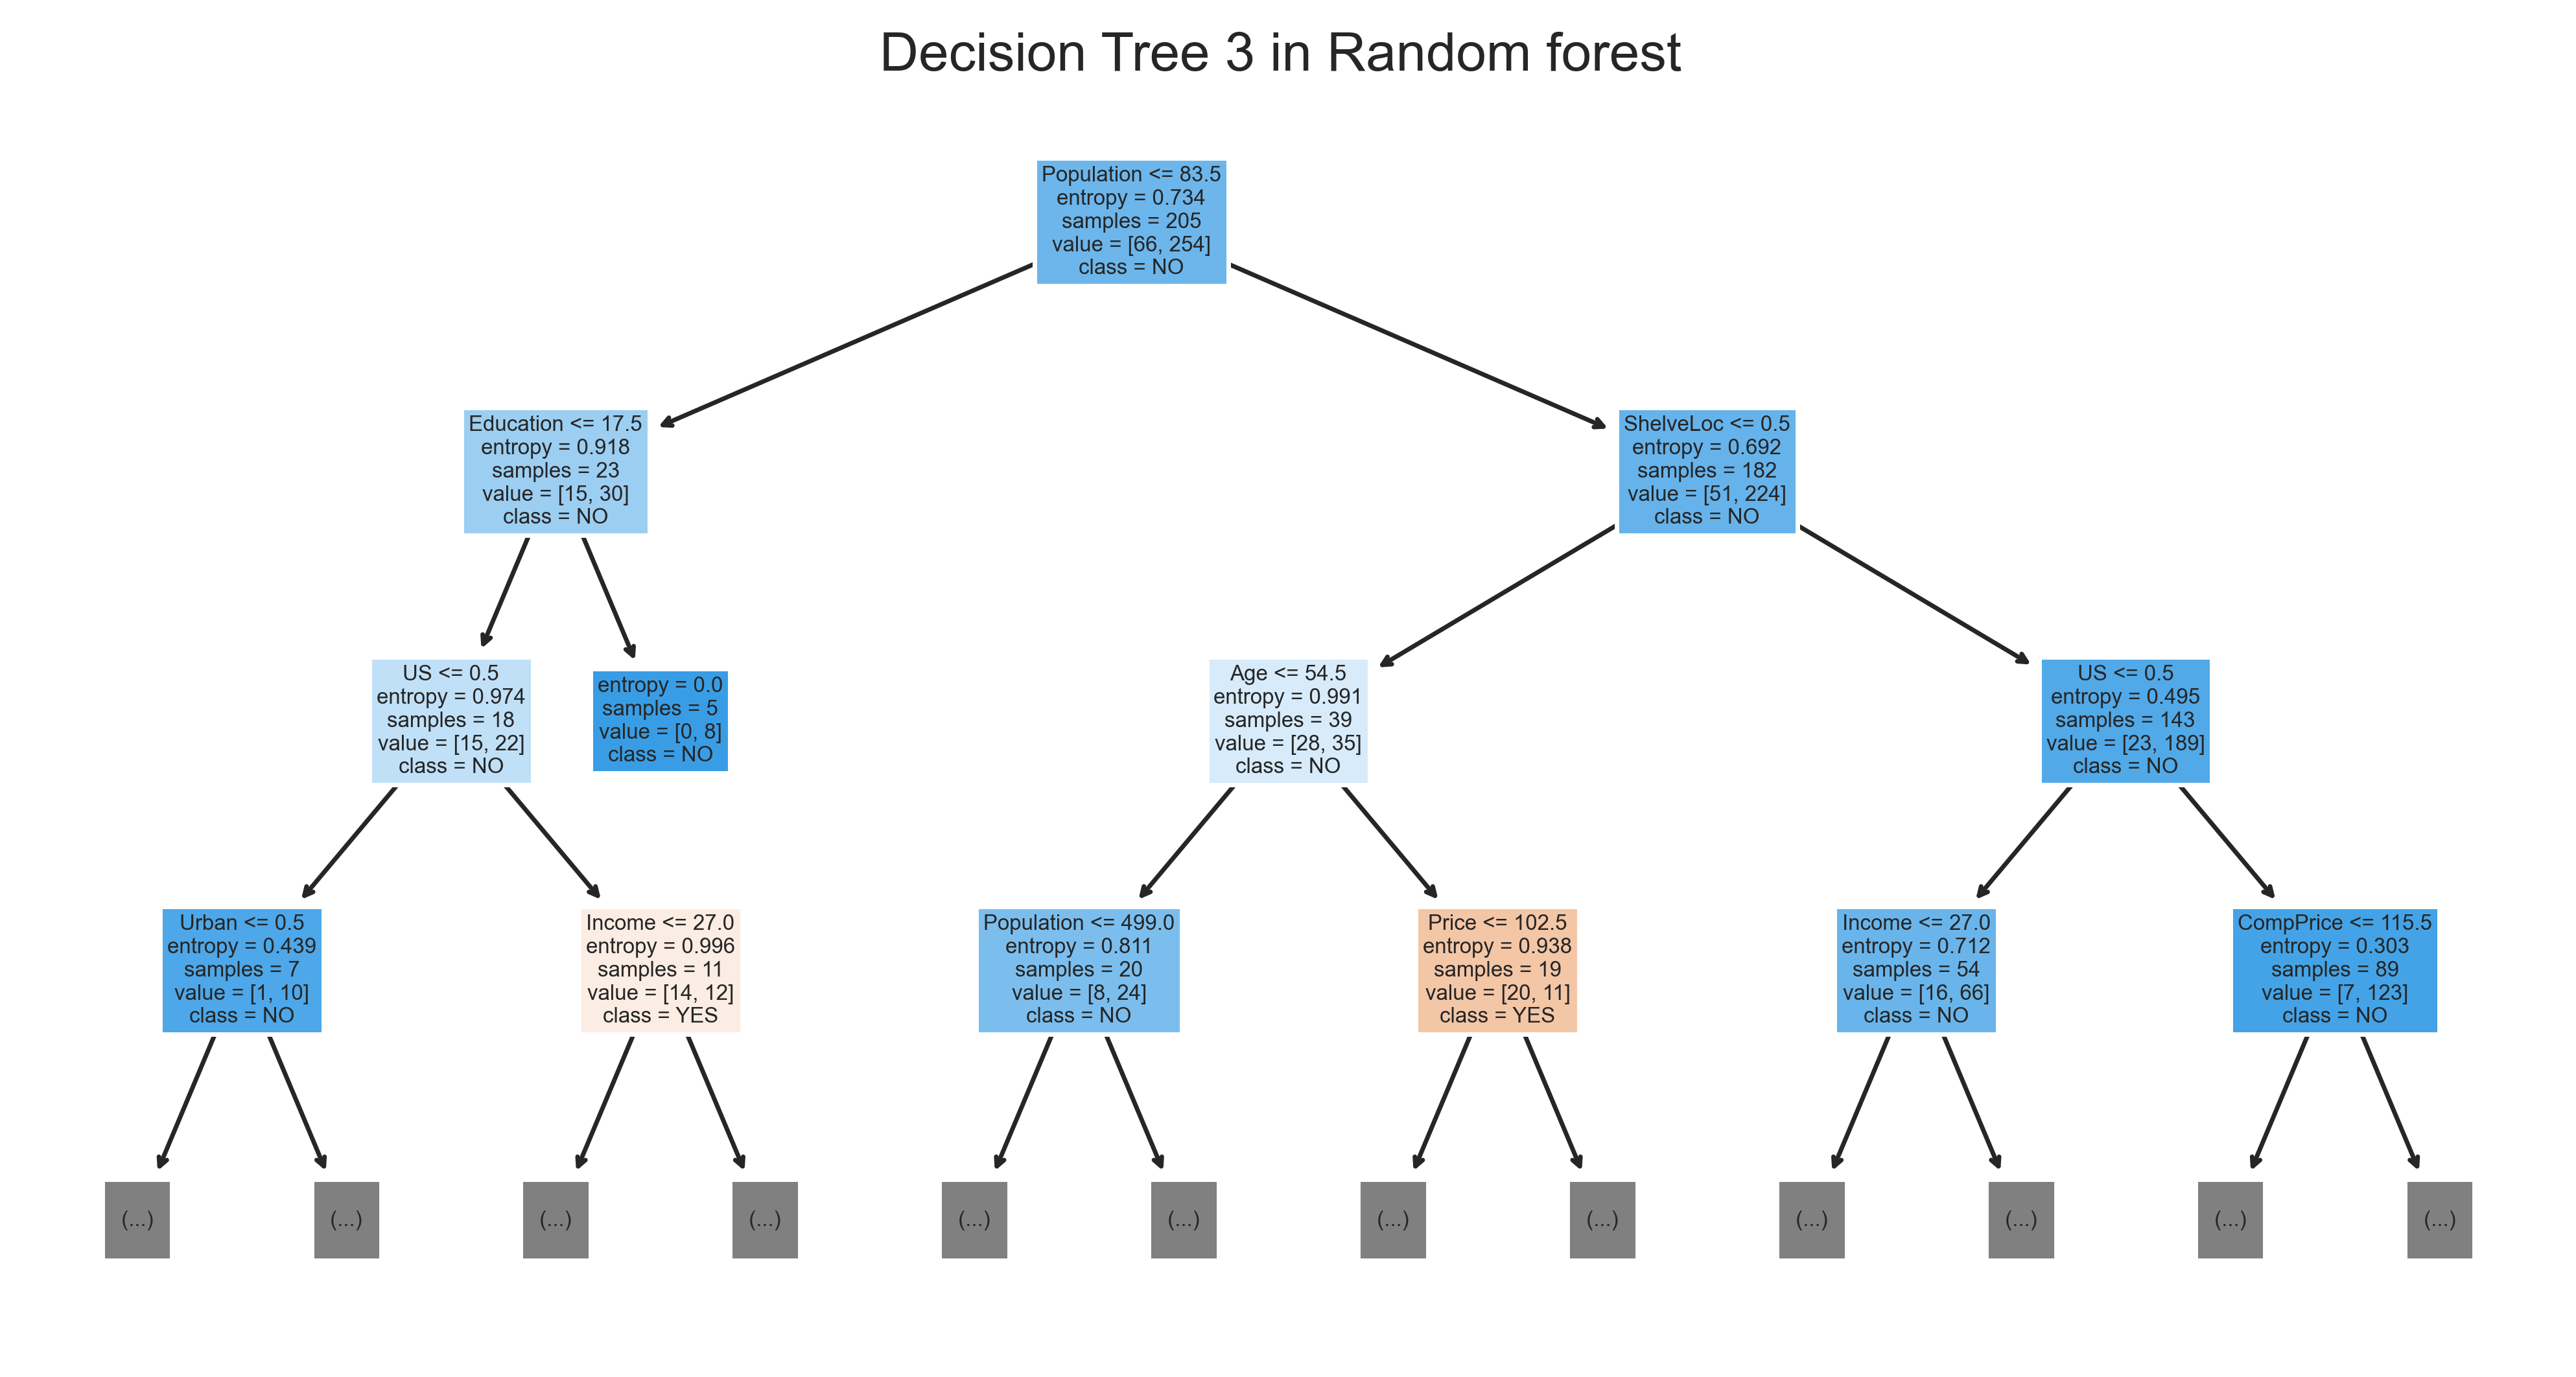

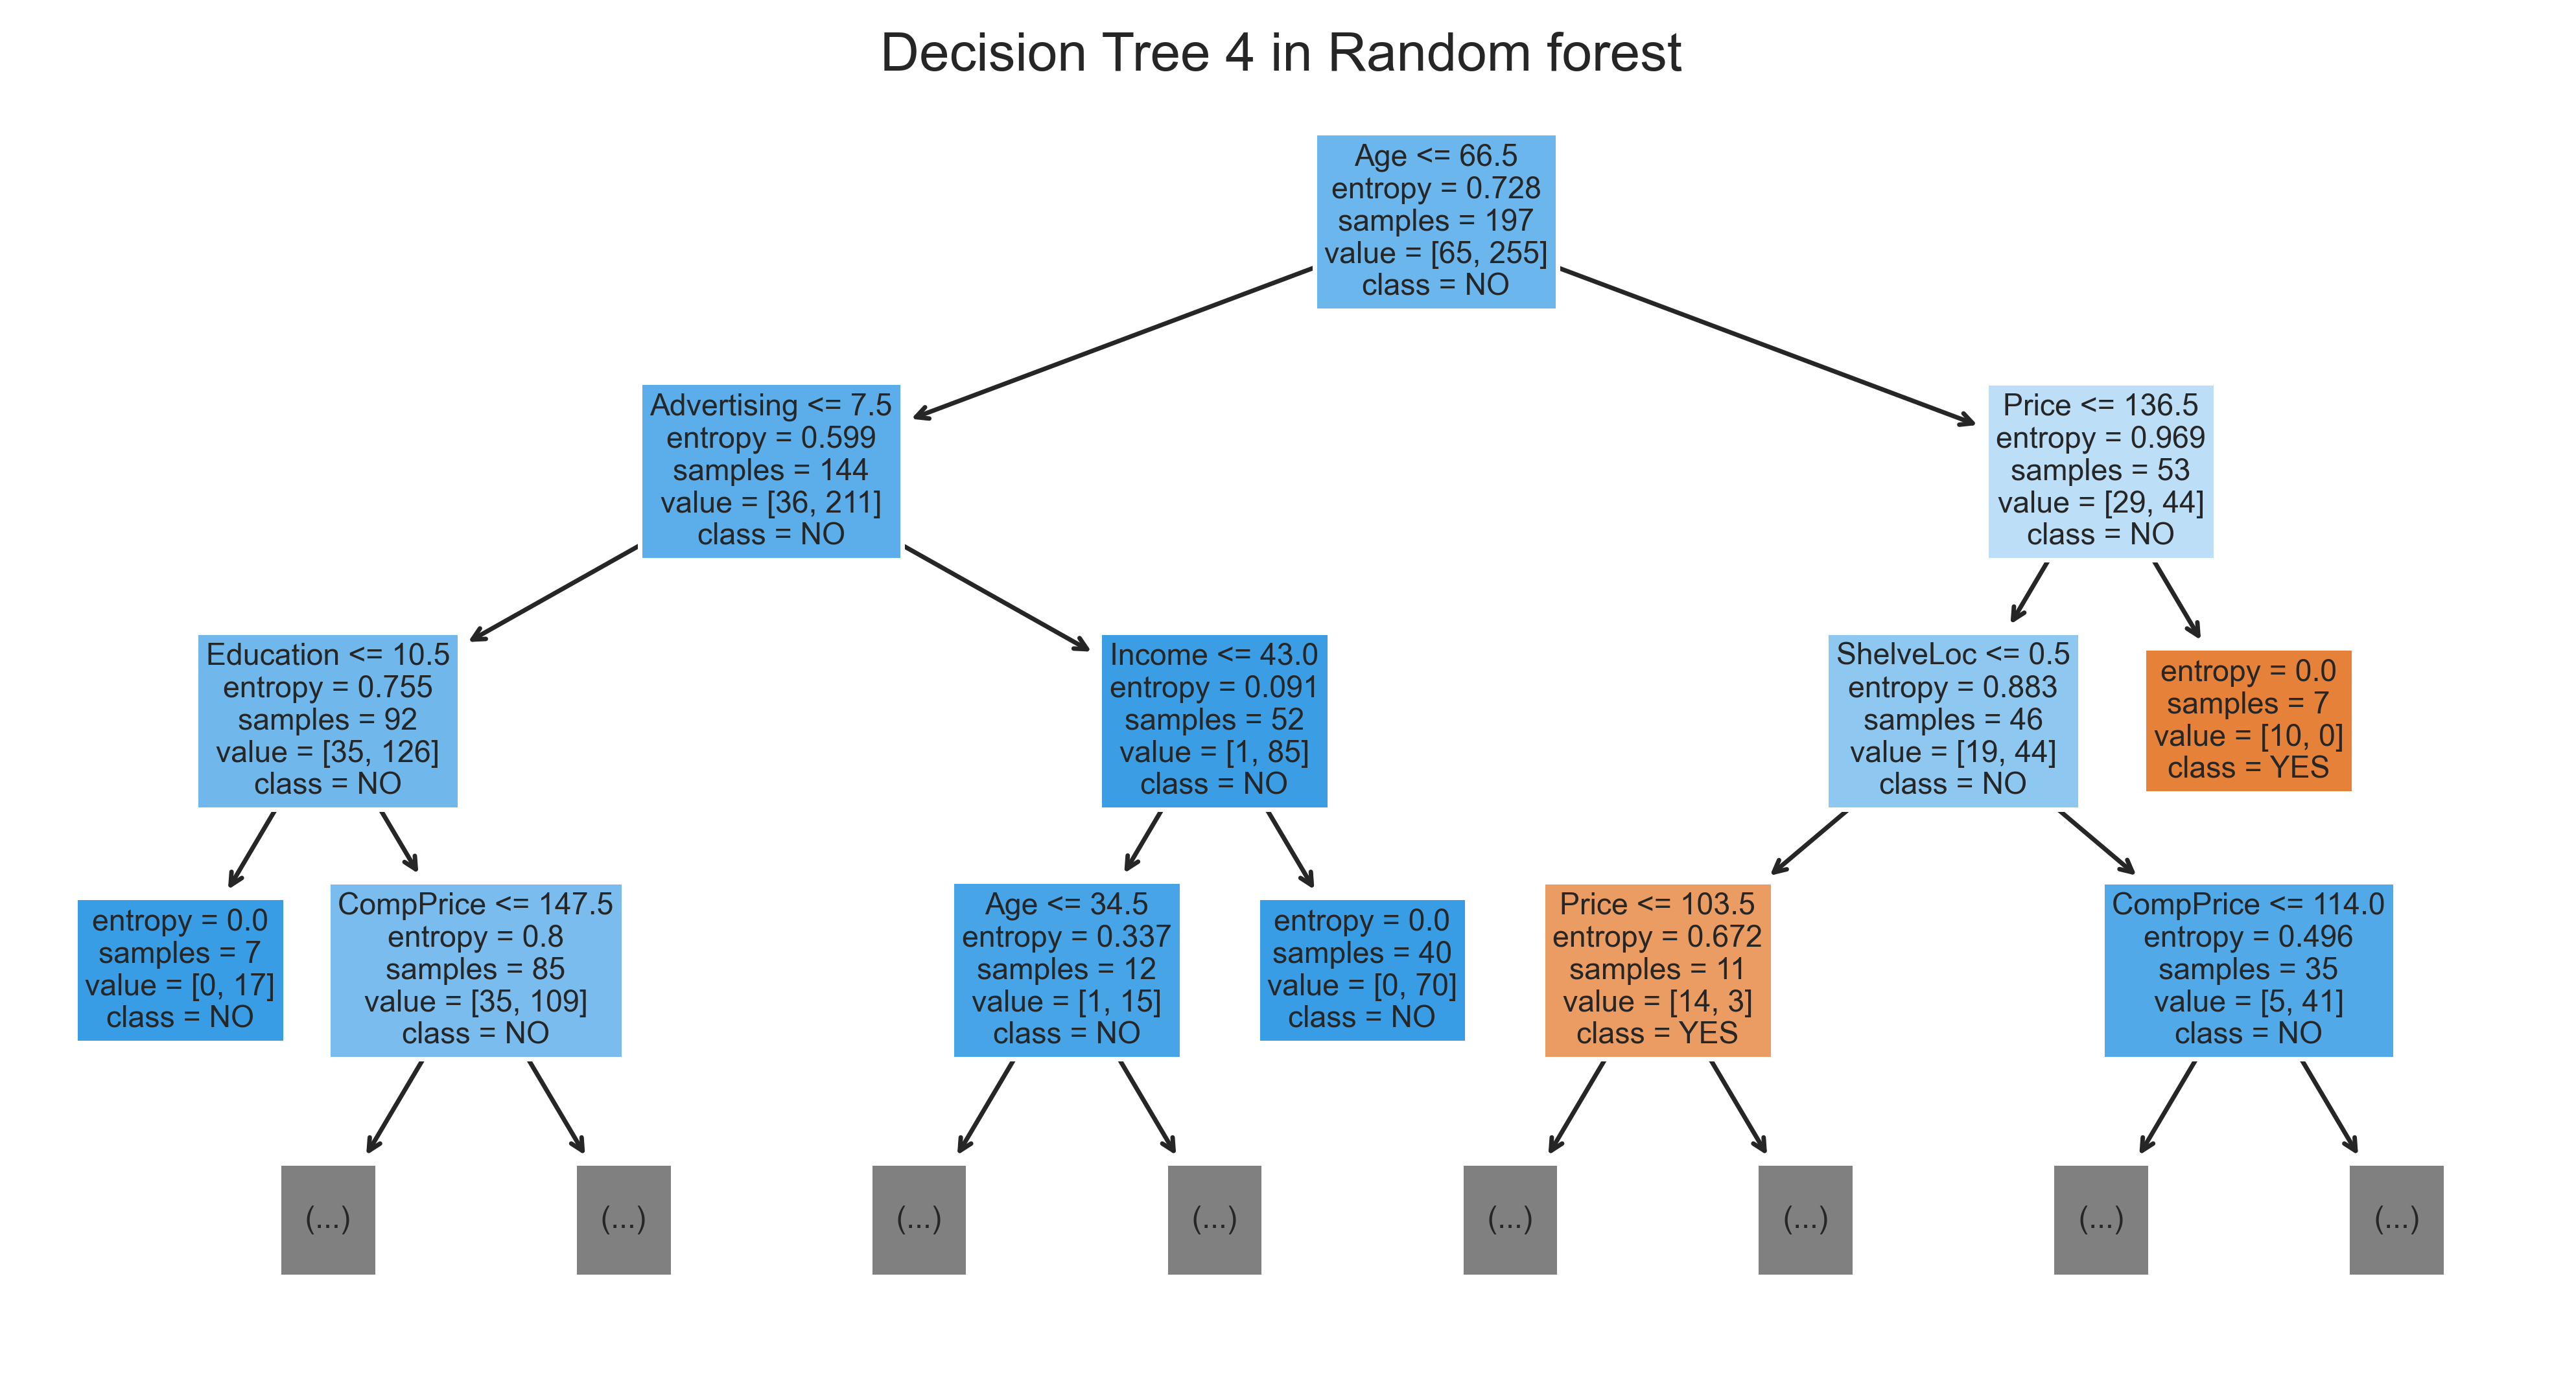

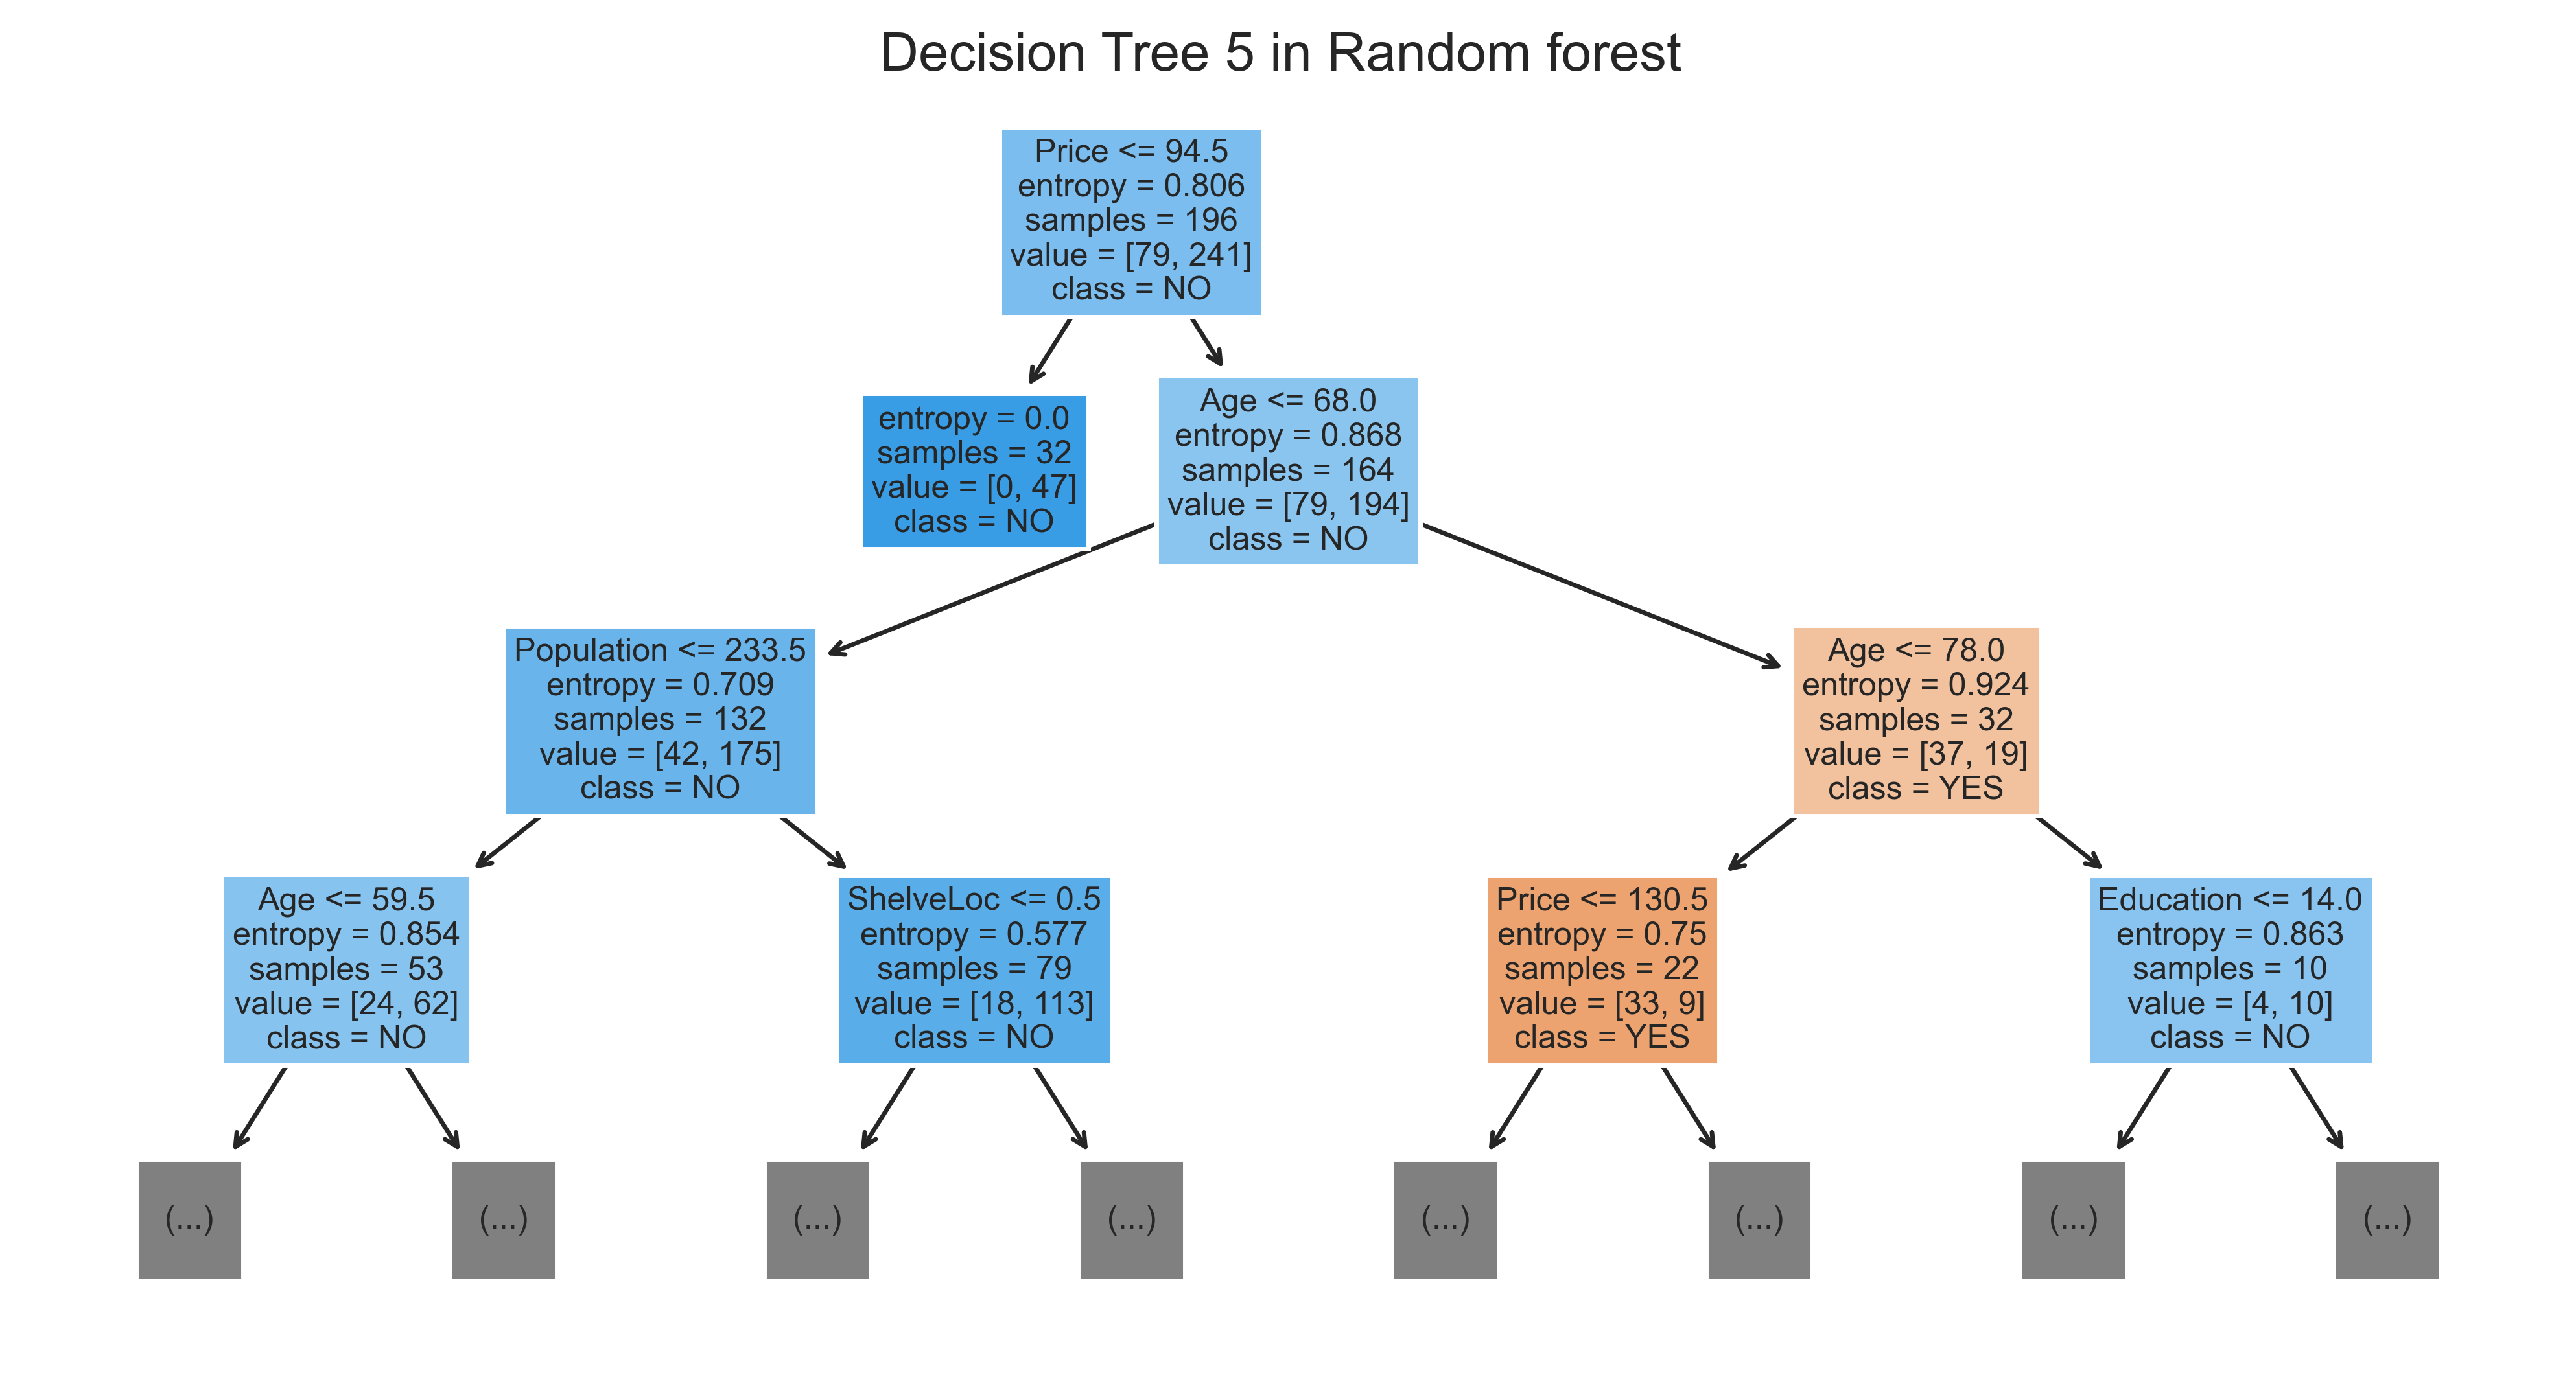

In [28]:
for i in range(5):
    tree.plot_tree(rf.estimators_[i] , feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'] , class_names= ['YES' , 'NO'] , filled= True , max_depth= 3)
    plt.title(f"Decision Tree {i + 1} in Random forest ")
    plt.show()

# Q2→→→Ans→→→Fraud_Check_Dataset

In [29]:
df = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\15_Random_Forest\Fraud_check.csv")
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [30]:
df.columns = ['ugrad' , 'mstat' , 'tincome' , 'cpop' , 'wexp' , 'urban']
df

ugrad     mstat  tincome    cpop  wexp urban
0      NO    Single    68833   50047    10   YES
1     YES  Divorced    33700  134075    18   YES
2      NO   Married    36925  160205    30   YES
3     YES    Single    50190  193264    15   YES
4      NO   Married    81002   27533    28    NO
..    ...       ...      ...     ...   ...   ...
595   YES  Divorced    76340   39492     7   YES
596   YES  Divorced    69967   55369     2   YES
597    NO  Divorced    47334  154058     0   YES
598   YES   Married    98592  180083    17    NO
599    NO  Divorced    96519  158137    16    NO

[600 rows x 6 columns]

In [31]:
df.describe()

tincome           cpop        wexp
count    600.000000     600.000000  600.000000
mean   55208.375000  108747.368333   15.558333
std    26204.827597   49850.075134    8.842147
min    10003.000000   25779.000000    0.000000
25%    32871.500000   66966.750000    8.000000
50%    55074.500000  106493.500000   15.000000
75%    78611.750000  150114.250000   24.000000
max    99619.000000  199778.000000   30.000000

In [32]:
df.isna().sum()

ugrad      0
mstat      0
tincome    0
cpop       0
wexp       0
urban      0
dtype: int64

In [33]:
df[df.duplicated()]

Empty DataFrame
Columns: [ugrad, mstat, tincome, cpop, wexp, urban]
Index: []

In [34]:
encoding(df , 'ugrad' , 'mstat' , 'urban')
df

ugrad  mstat  tincome    cpop  wexp  urban
0        0      2    68833   50047    10      1
1        1      0    33700  134075    18      1
2        0      1    36925  160205    30      1
3        1      2    50190  193264    15      1
4        0      1    81002   27533    28      0
..     ...    ...      ...     ...   ...    ...
595      1      0    76340   39492     7      1
596      1      0    69967   55369     2      1
597      0      0    47334  154058     0      1
598      1      1    98592  180083    17      0
599      0      0    96519  158137    16      0

[600 rows x 6 columns]

In [35]:
df['tincome'] = np.where(df['tincome'] <= 30000 , 'Risky' , 'Good')
df

ugrad  mstat tincome    cpop  wexp  urban
0        0      2    Good   50047    10      1
1        1      0    Good  134075    18      1
2        0      1    Good  160205    30      1
3        1      2    Good  193264    15      1
4        0      1    Good   27533    28      0
..     ...    ...     ...     ...   ...    ...
595      1      0    Good   39492     7      1
596      1      0    Good   55369     2      1
597      0      0    Good  154058     0      1
598      1      1    Good  180083    17      0
599      0      0    Good  158137    16      0

[600 rows x 6 columns]

<Axes: xlabel='tincome', ylabel='count'>

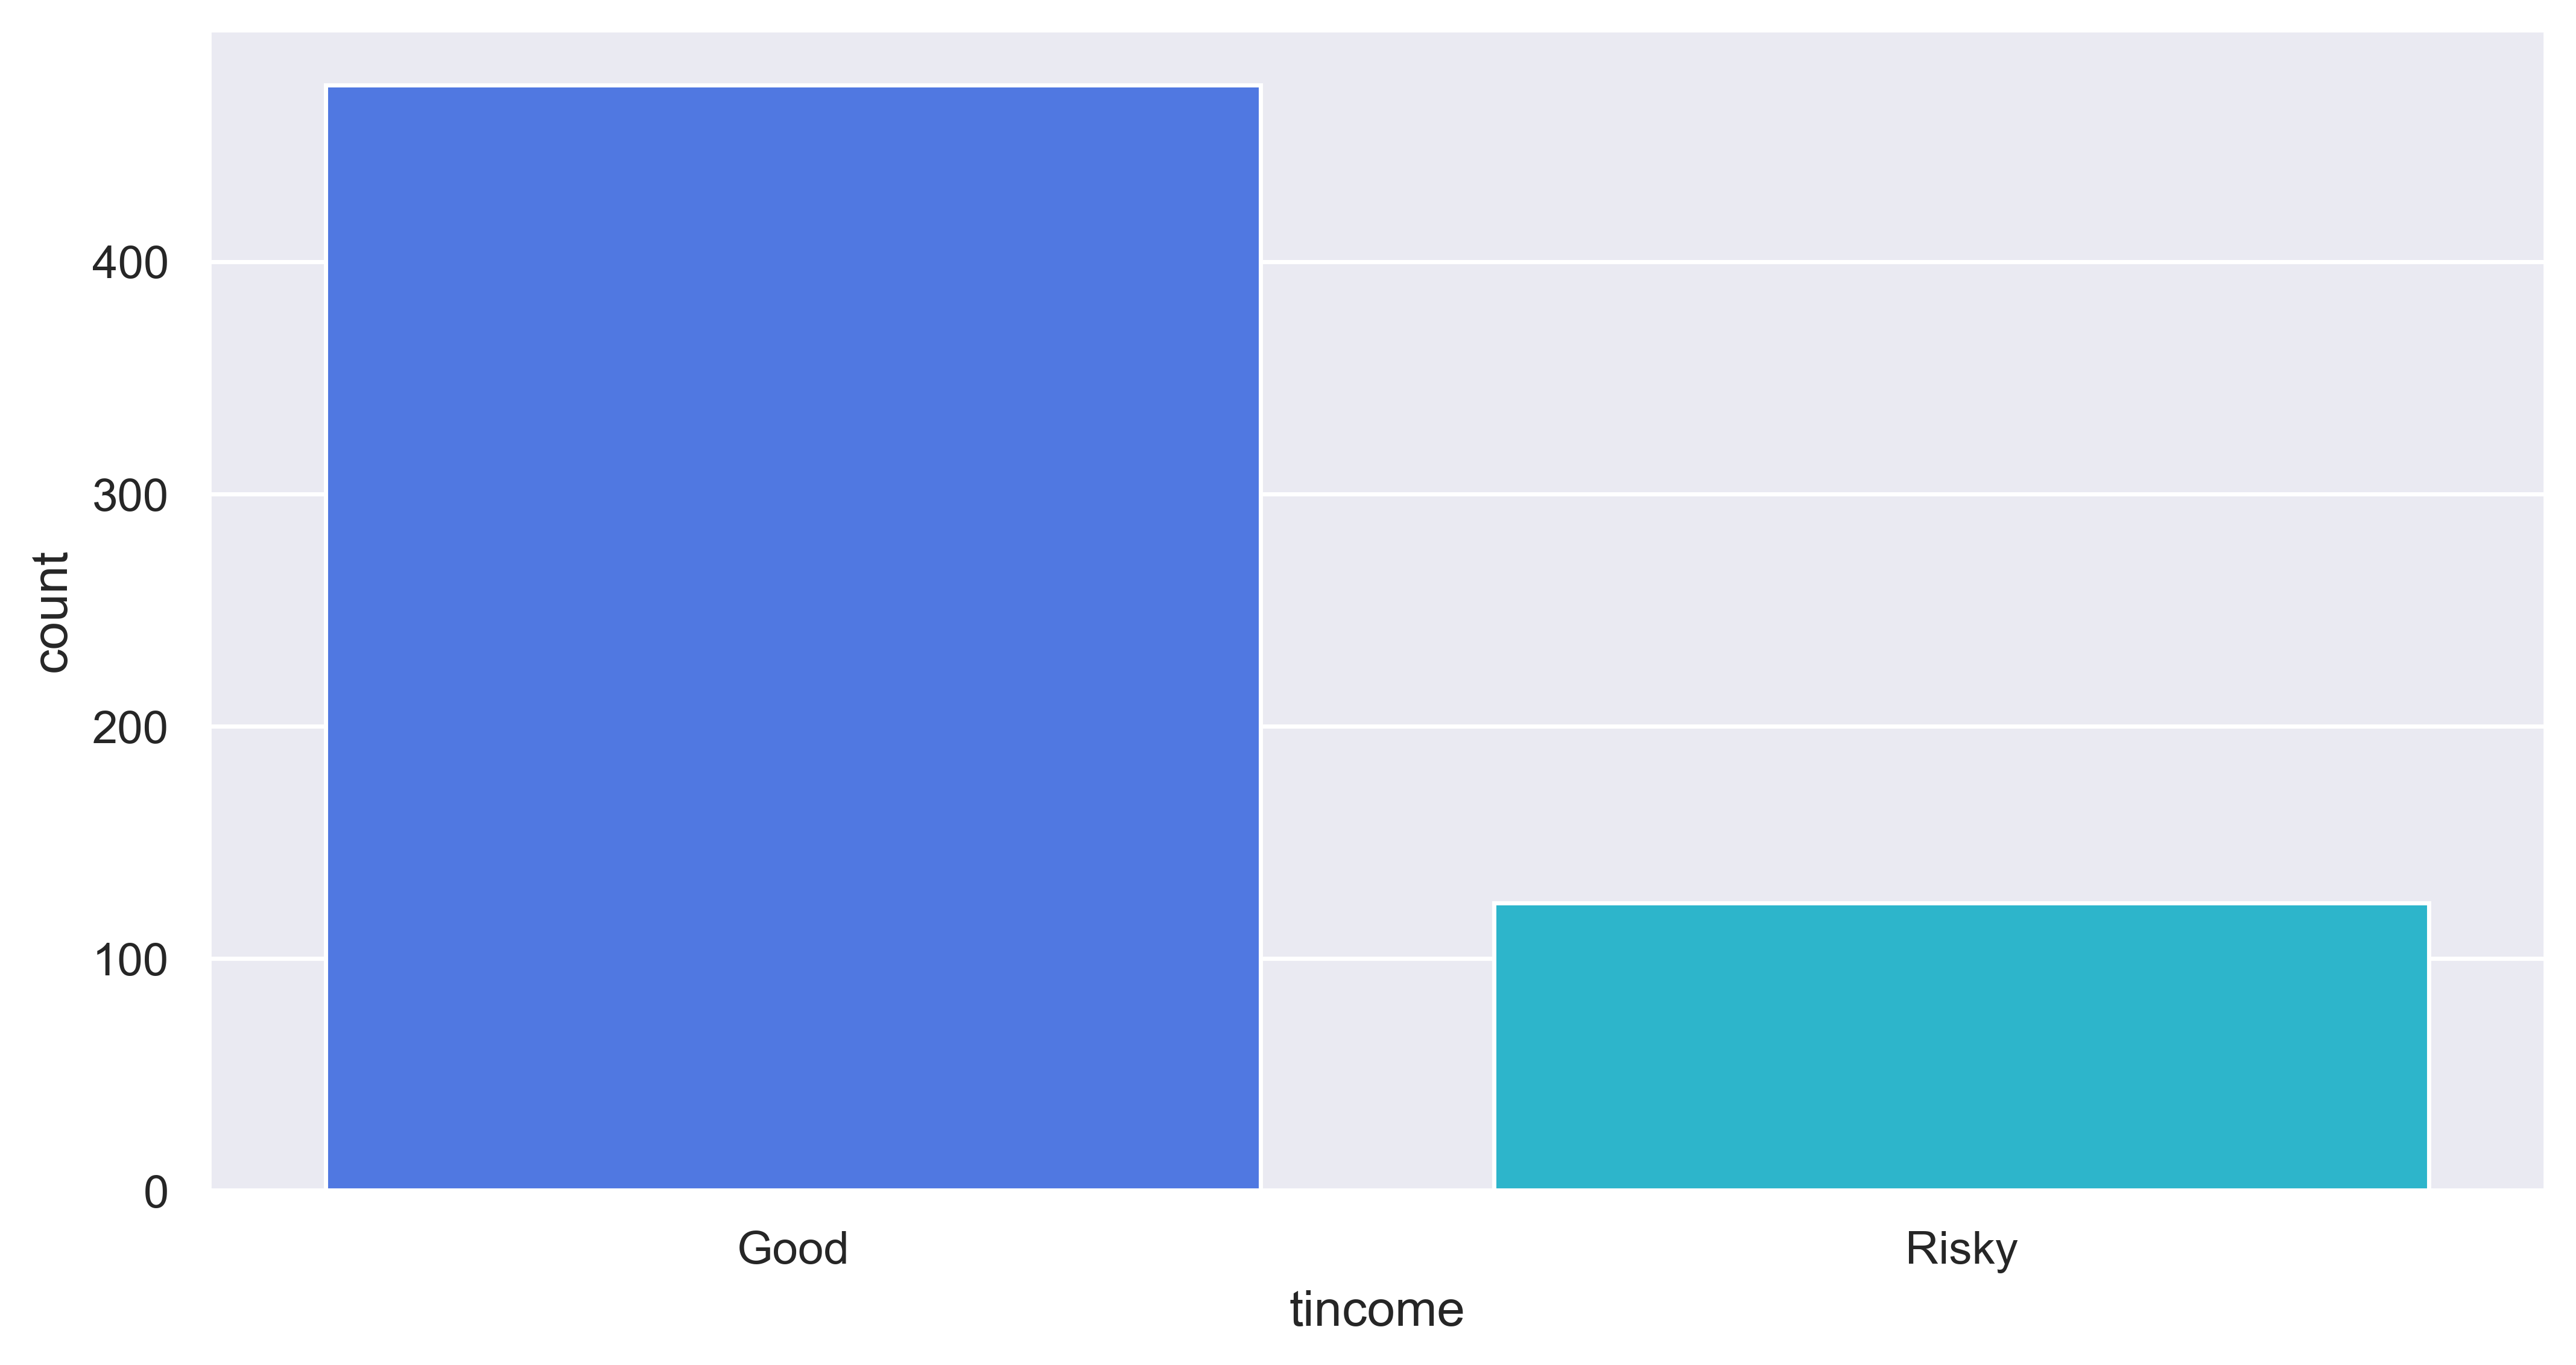

In [36]:
sns.countplot(x = df['tincome'])

In [37]:
df['tincome'].value_counts()

tincome
Good     476
Risky    124
Name: count, dtype: int64

In [38]:
df

ugrad  mstat tincome    cpop  wexp  urban
0        0      2    Good   50047    10      1
1        1      0    Good  134075    18      1
2        0      1    Good  160205    30      1
3        1      2    Good  193264    15      1
4        0      1    Good   27533    28      0
..     ...    ...     ...     ...   ...    ...
595      1      0    Good   39492     7      1
596      1      0    Good   55369     2      1
597      0      0    Good  154058     0      1
598      1      1    Good  180083    17      0
599      0      0    Good  158137    16      0

[600 rows x 6 columns]

In [39]:
x = df[['ugrad' , 'mstat' , 'cpop' , 'wexp' , 'urban']]
y = df['tincome']
x

ugrad  mstat    cpop  wexp  urban
0        0      2   50047    10      1
1        1      0  134075    18      1
2        0      1  160205    30      1
3        1      2  193264    15      1
4        0      1   27533    28      0
..     ...    ...     ...   ...    ...
595      1      0   39492     7      1
596      1      0   55369     2      1
597      0      0  154058     0      1
598      1      1  180083    17      0
599      0      0  158137    16      0

[600 rows x 5 columns]

In [40]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tincome, Length: 600, dtype: object

In [41]:
xtr , xte , ytr , yte = train_test_split( x , y , test_size= 0.2 , random_state= 42)
xtr

ugrad  mstat    cpop  wexp  urban
145      0      0  197422     2      1
9        1      0  155482     4      1
375      0      1  130935     2      0
523      0      0   42198    12      0
188      0      0  137569    10      0
..     ...    ...     ...   ...    ...
71       0      2  105680    22      0
106      1      2   58535    20      1
270      0      1  130680     5      0
435      0      0  111774     4      1
102      1      0   91488    23      0

[480 rows x 5 columns]

In [42]:
ytr

145     Good
9       Good
375     Good
523     Good
188    Risky
       ...  
71      Good
106    Risky
270     Good
435     Good
102     Good
Name: tincome, Length: 480, dtype: object

In [43]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [44]:
rfc.fit(xtr , ytr )
yp = rfc.predict(xte)
yp

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

In [45]:
print(classification_report(yte ,yp))

              precision    recall  f1-score   support

        Good       0.78      0.96      0.86        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.75       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.75      0.67       120



In [46]:
rfc

RandomForestClassifier()

In [92]:
para = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : list(range(3 , 11 , 2))   
}

In [93]:
grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid=para , verbose=1 )
grid

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9]},
             verbose=1)

In [94]:
grid.fit(xtr , ytr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9]},
             verbose=1)

In [95]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [96]:
rfc = RandomForestClassifier(criterion='gini' , max_depth= 3)
rfc

RandomForestClassifier(max_depth=3)

In [97]:
rfc.fit(xtr , ytr)
yp = rfc.predict(xte)
yp

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [98]:
print(classification_report(yte , yp))

              precision    recall  f1-score   support

        Good       0.78      1.00      0.88        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



- Accuracy will be increased by 3 - 4% by Hyperparameter Tuning

In [82]:
rfc.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1525269650)

In [83]:
x.columns

Index(['ugrad', 'mstat', 'cpop', 'wexp', 'urban'], dtype='object')

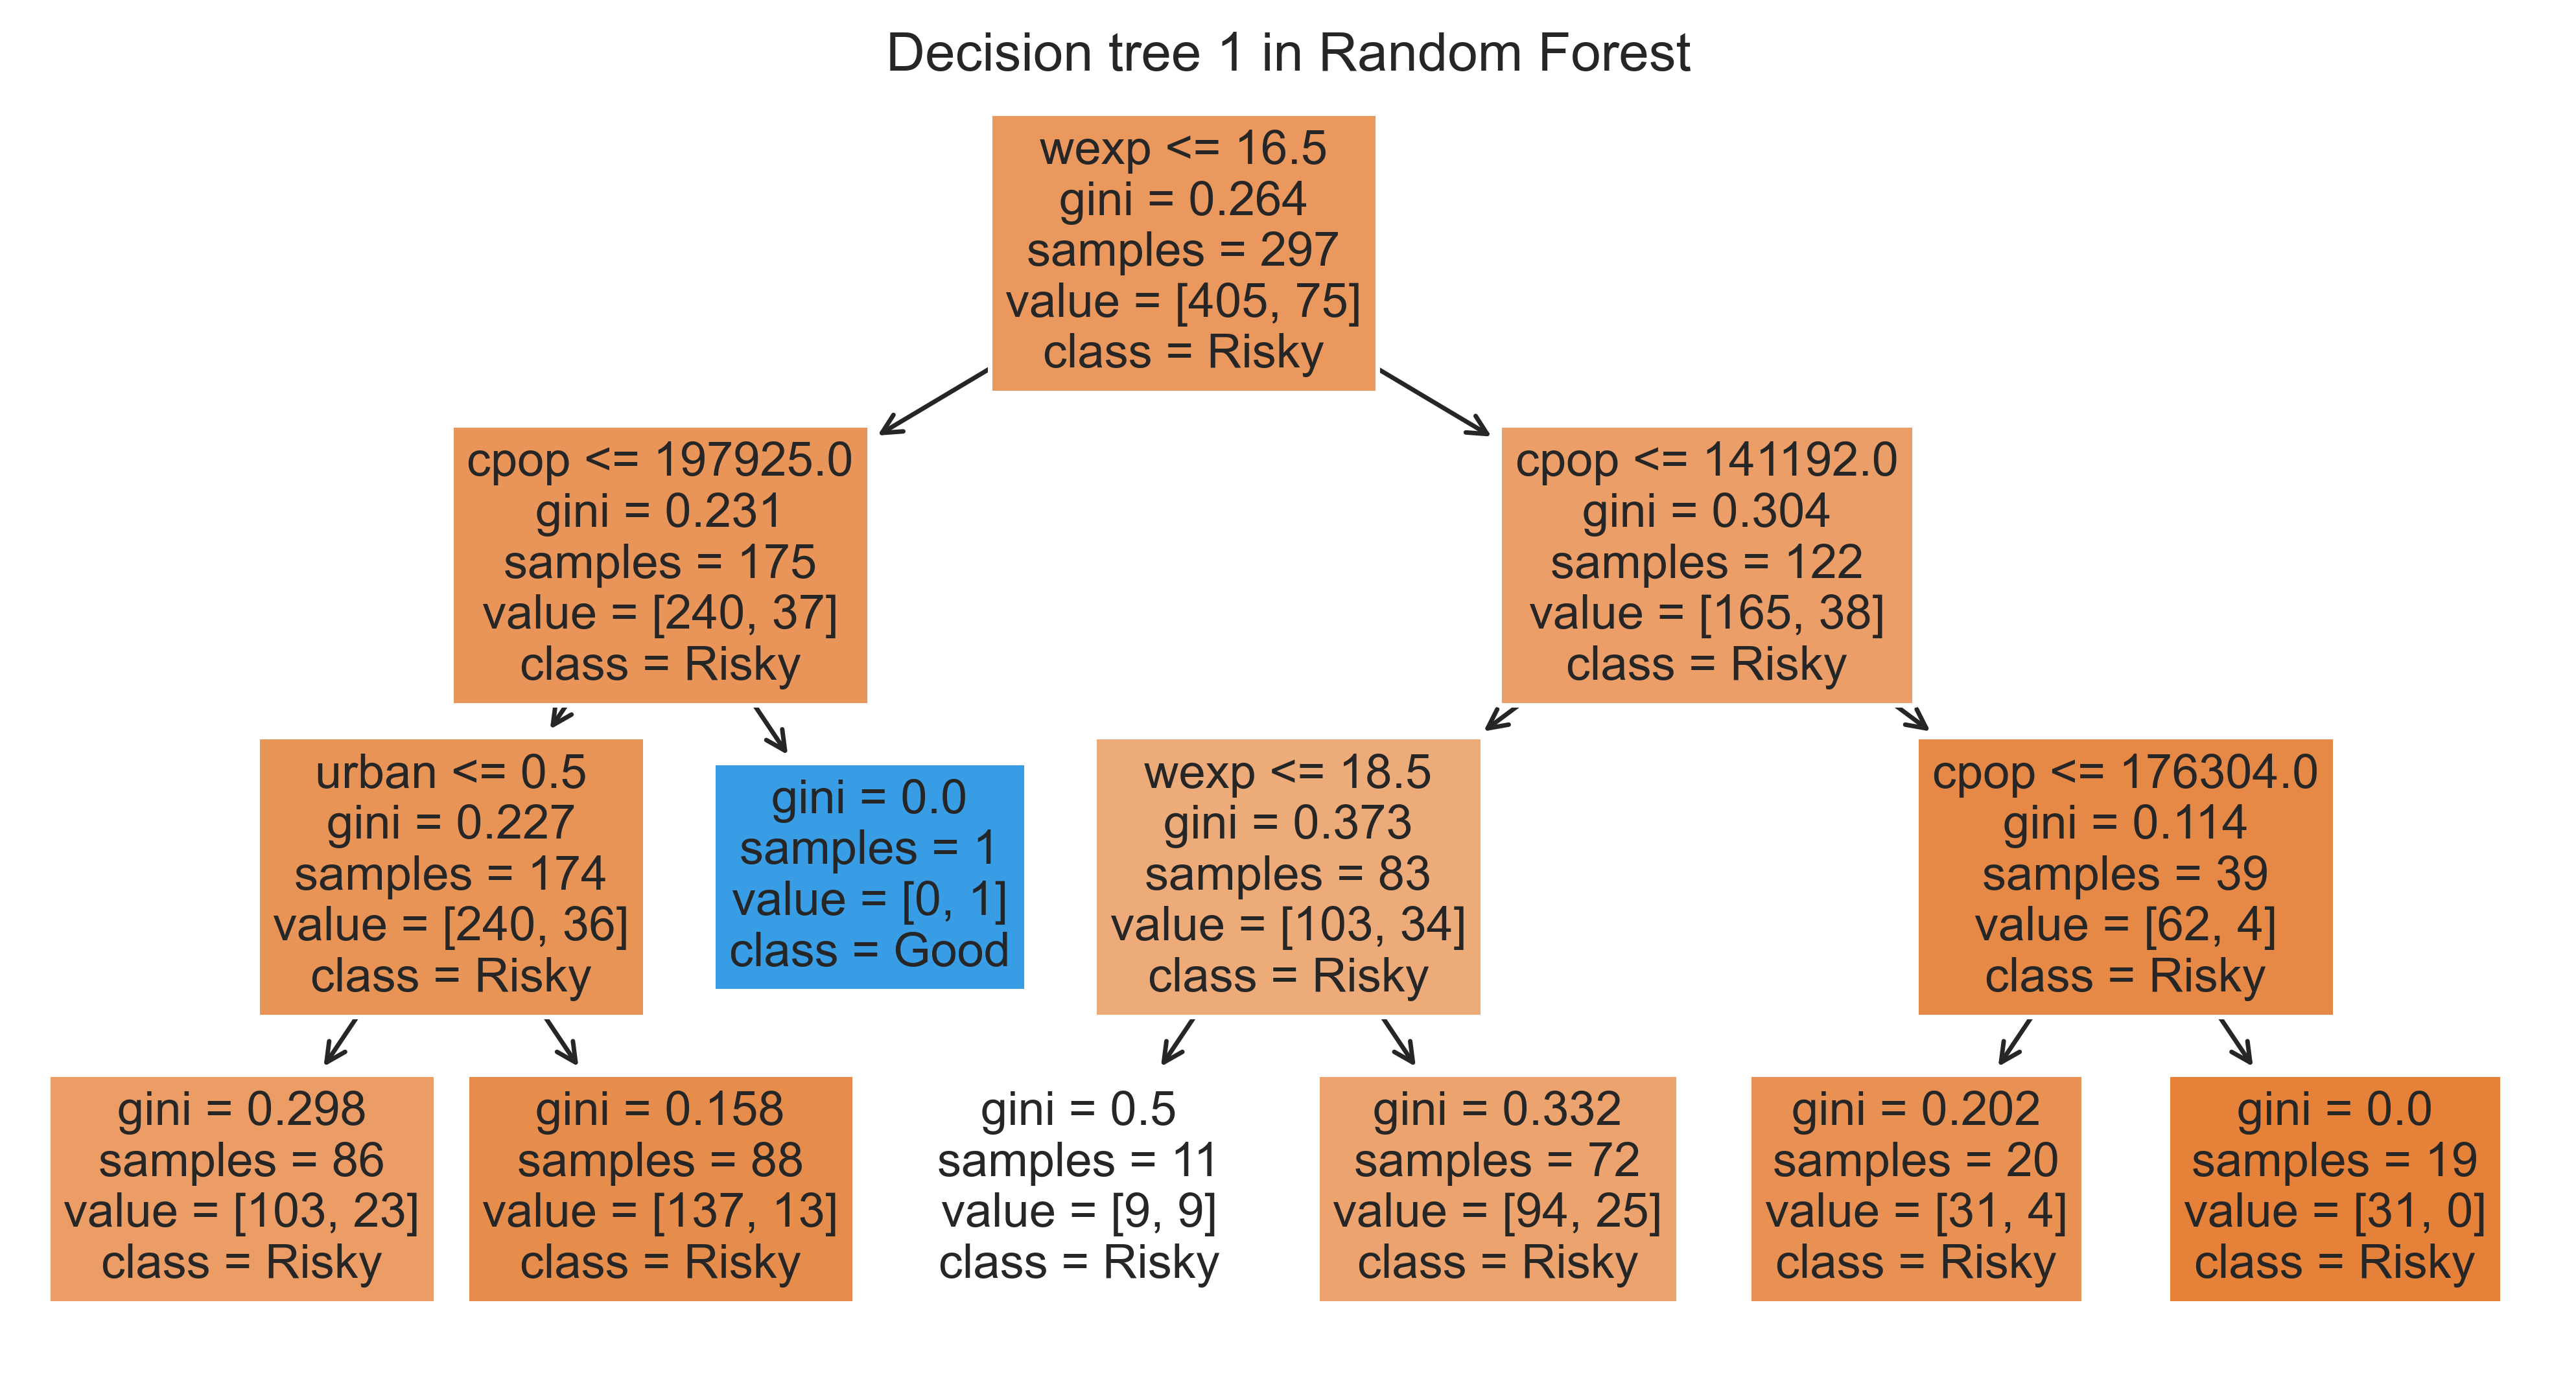

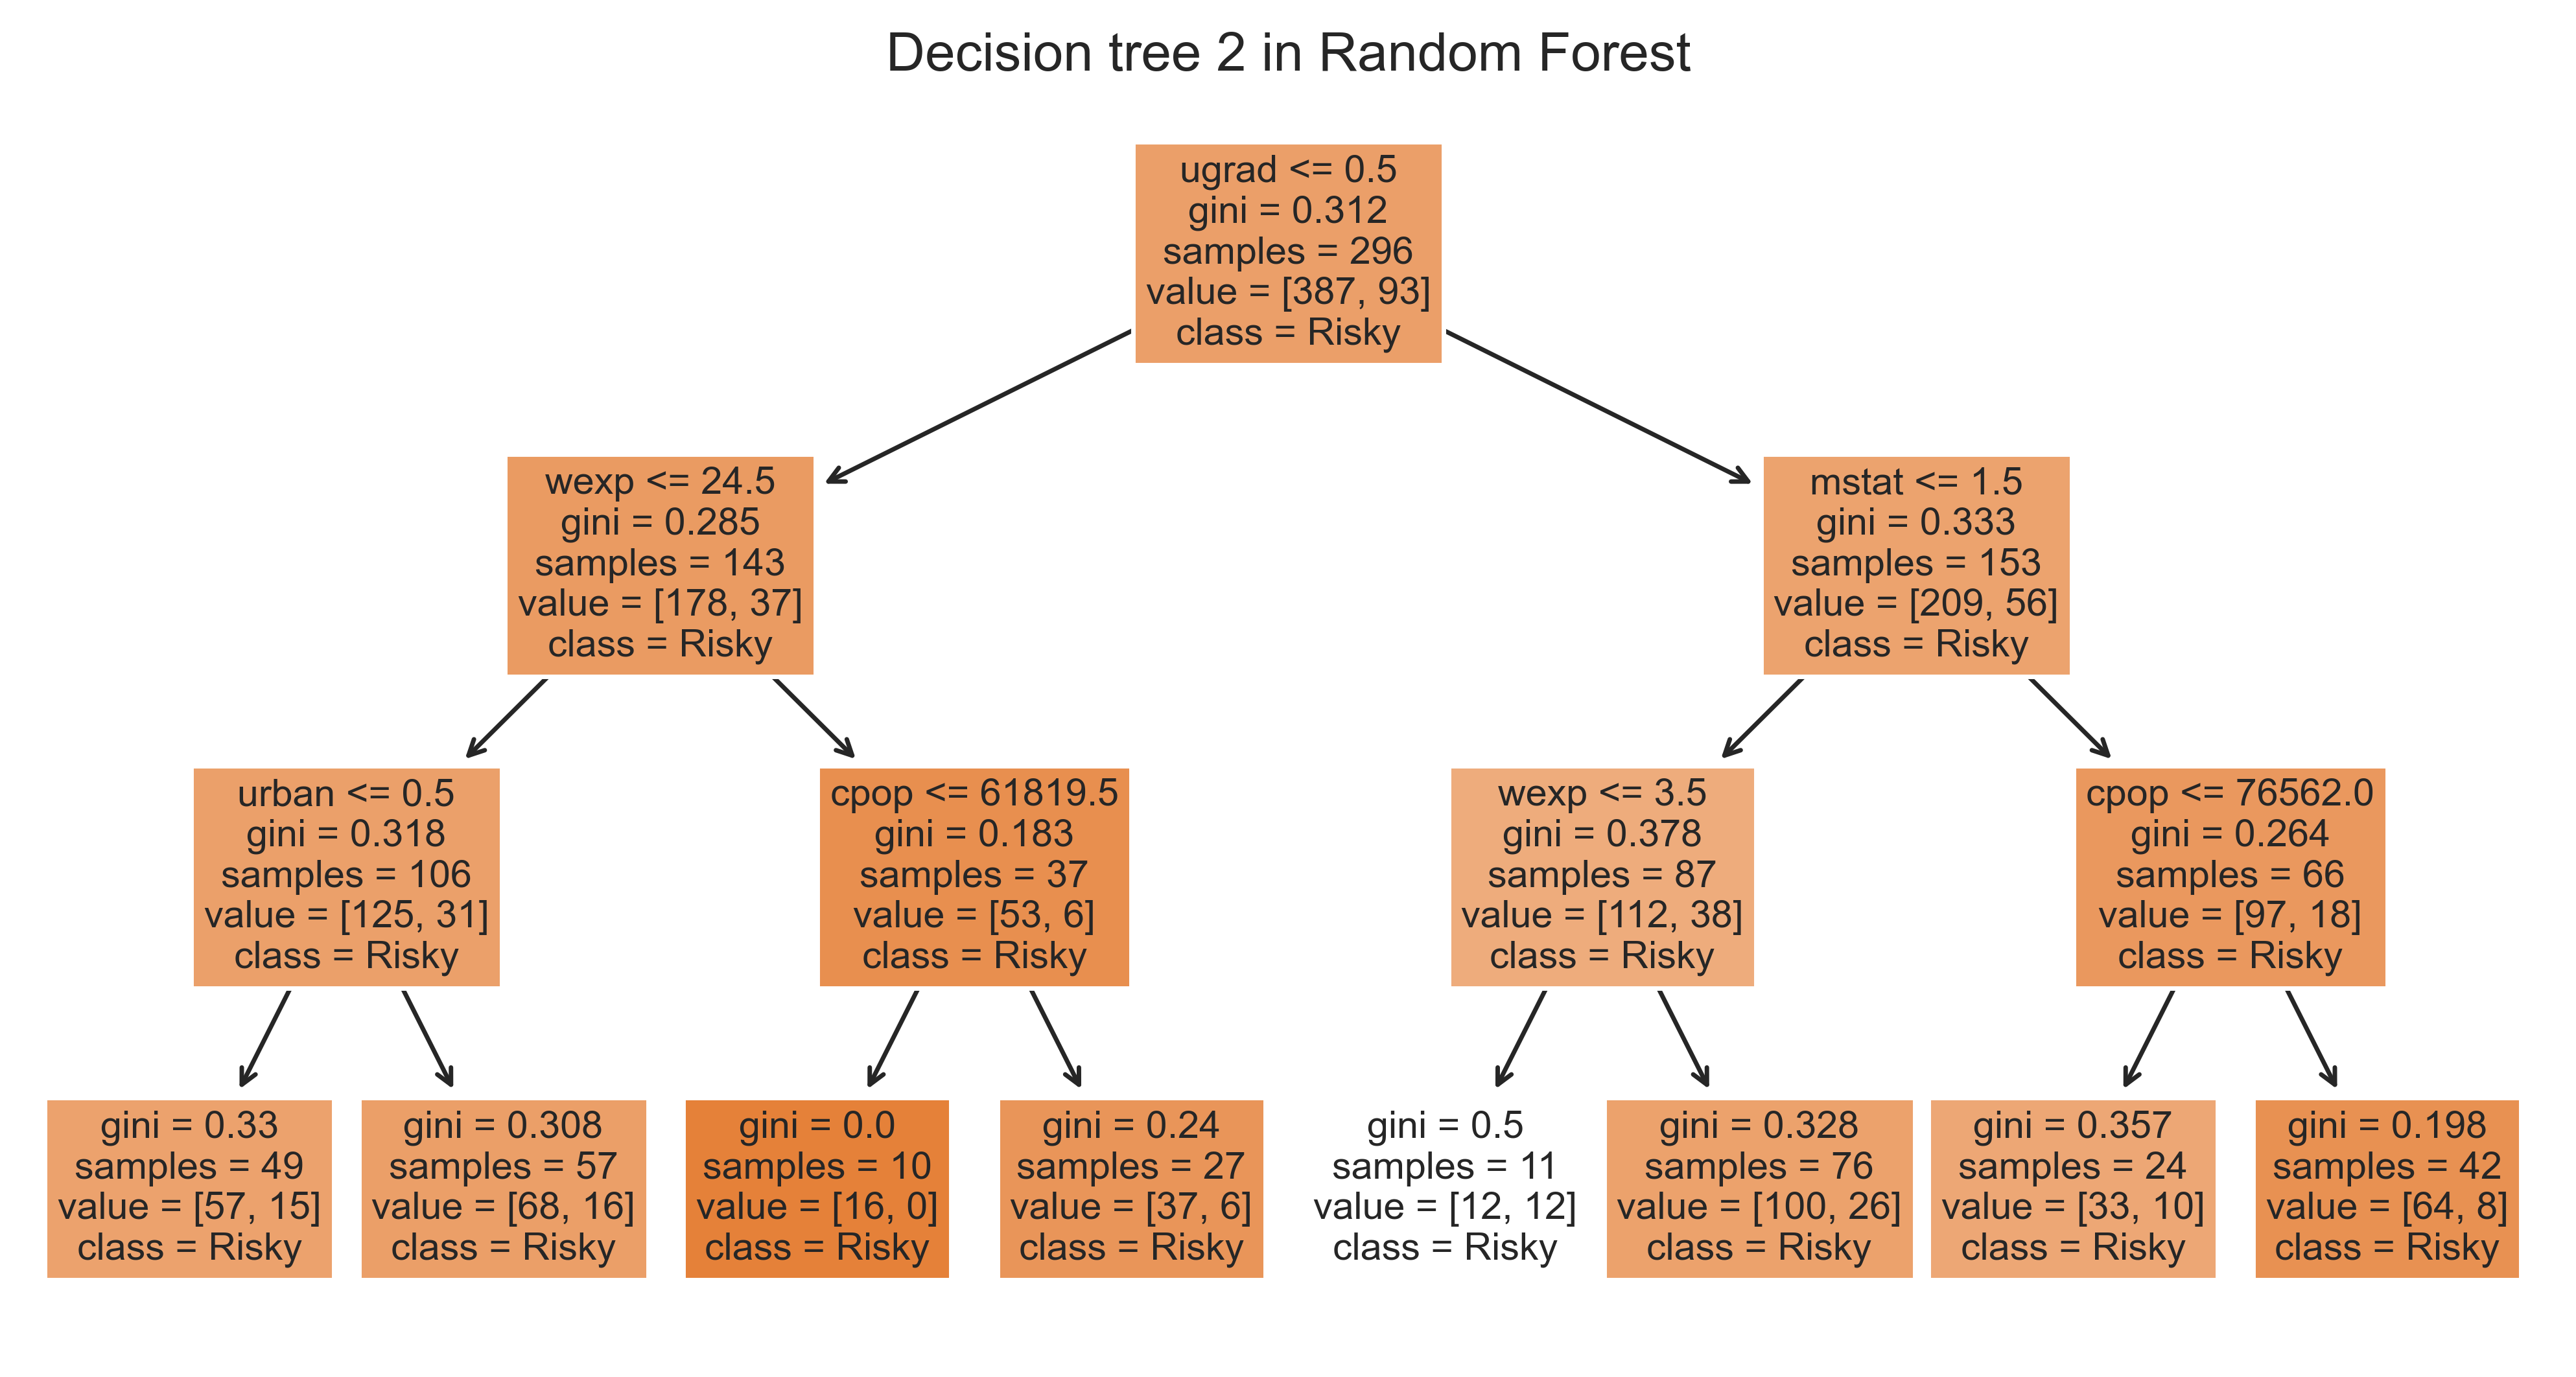

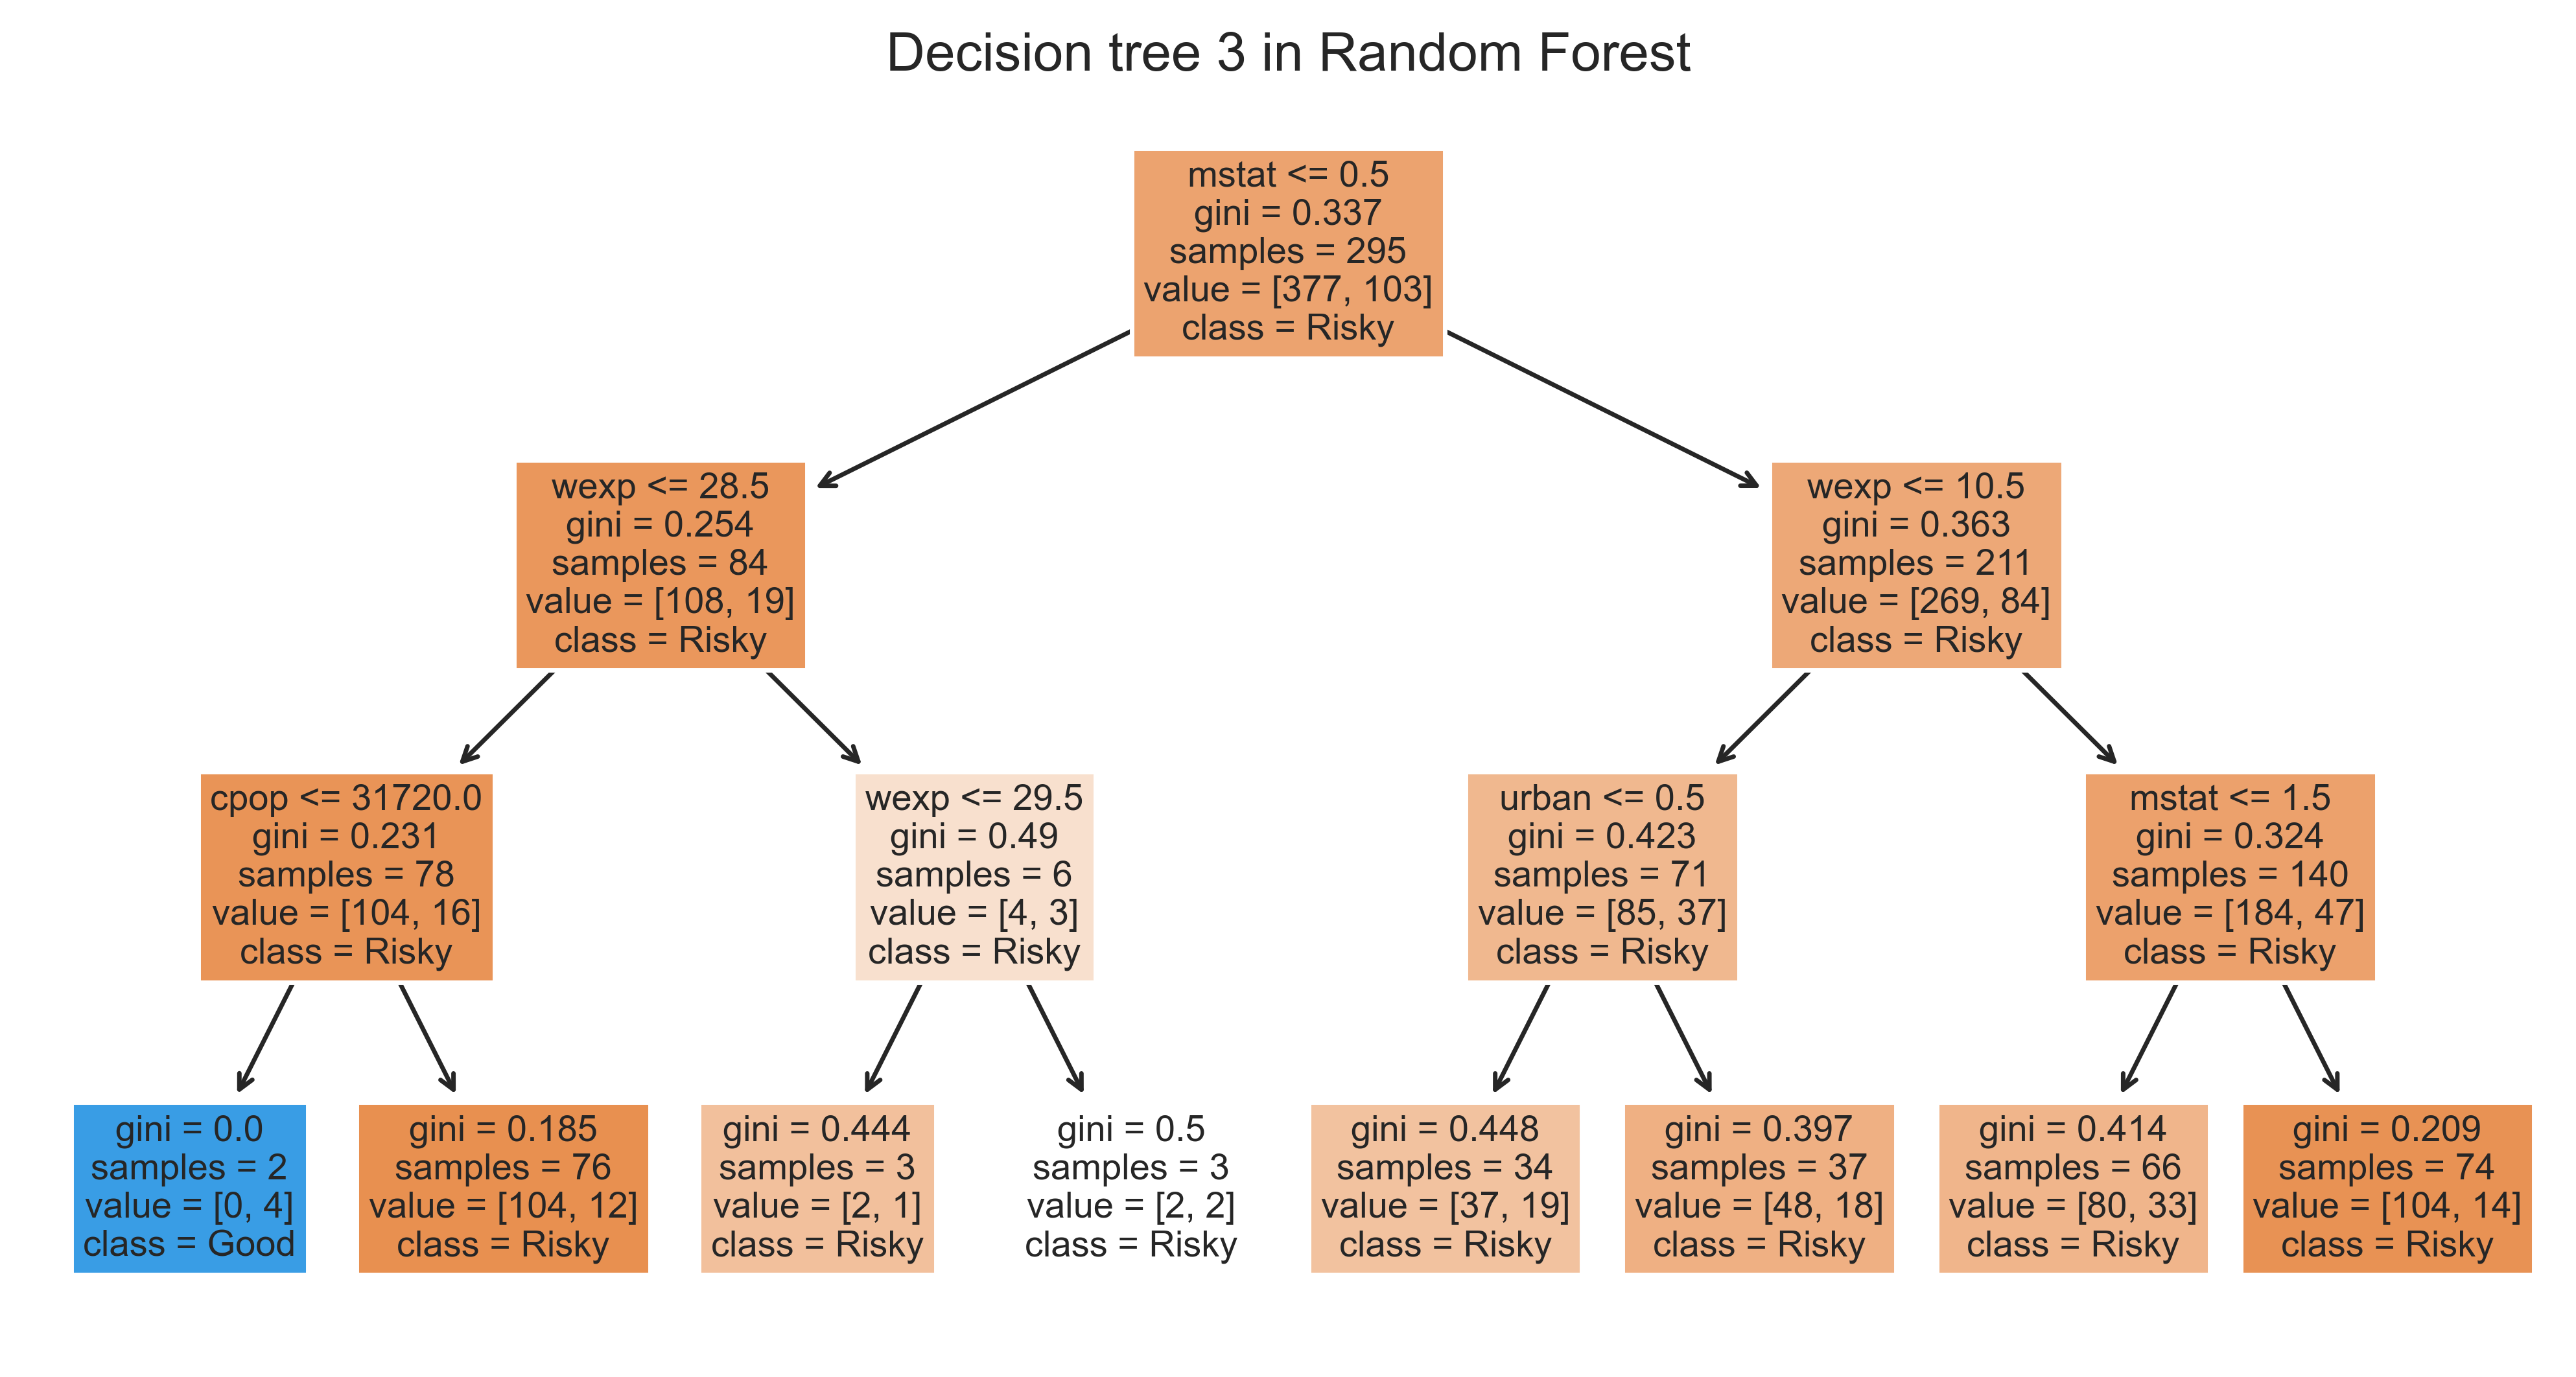

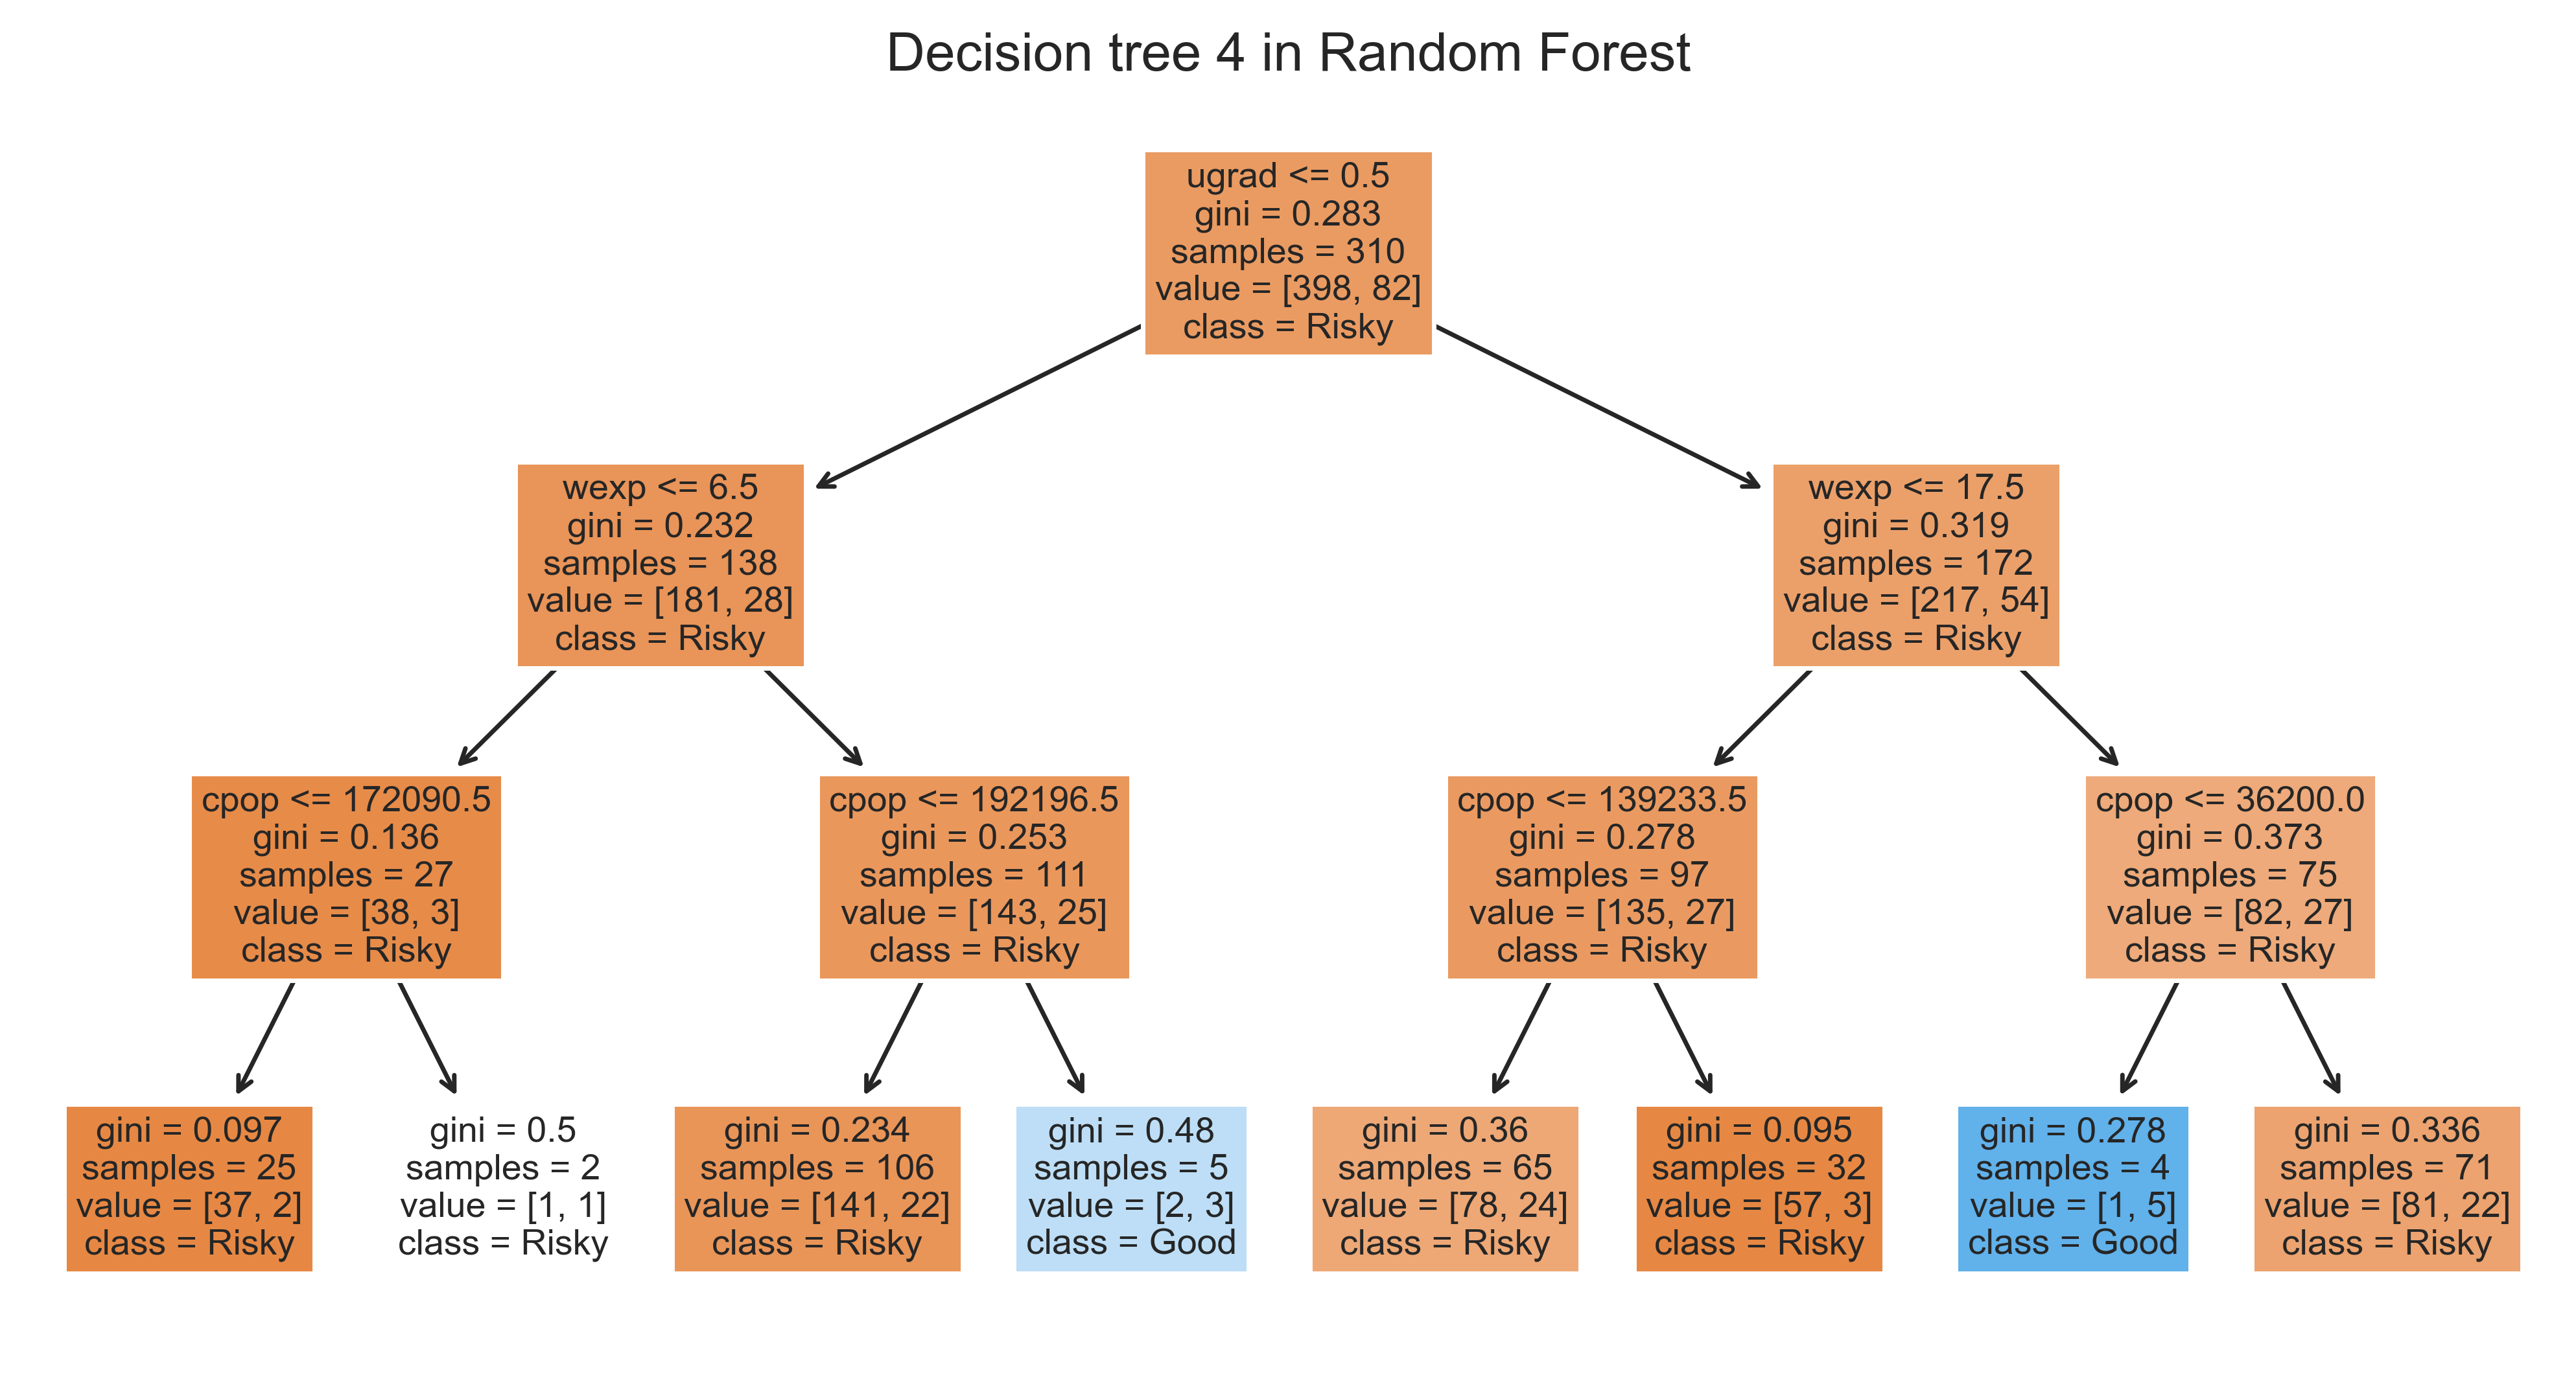

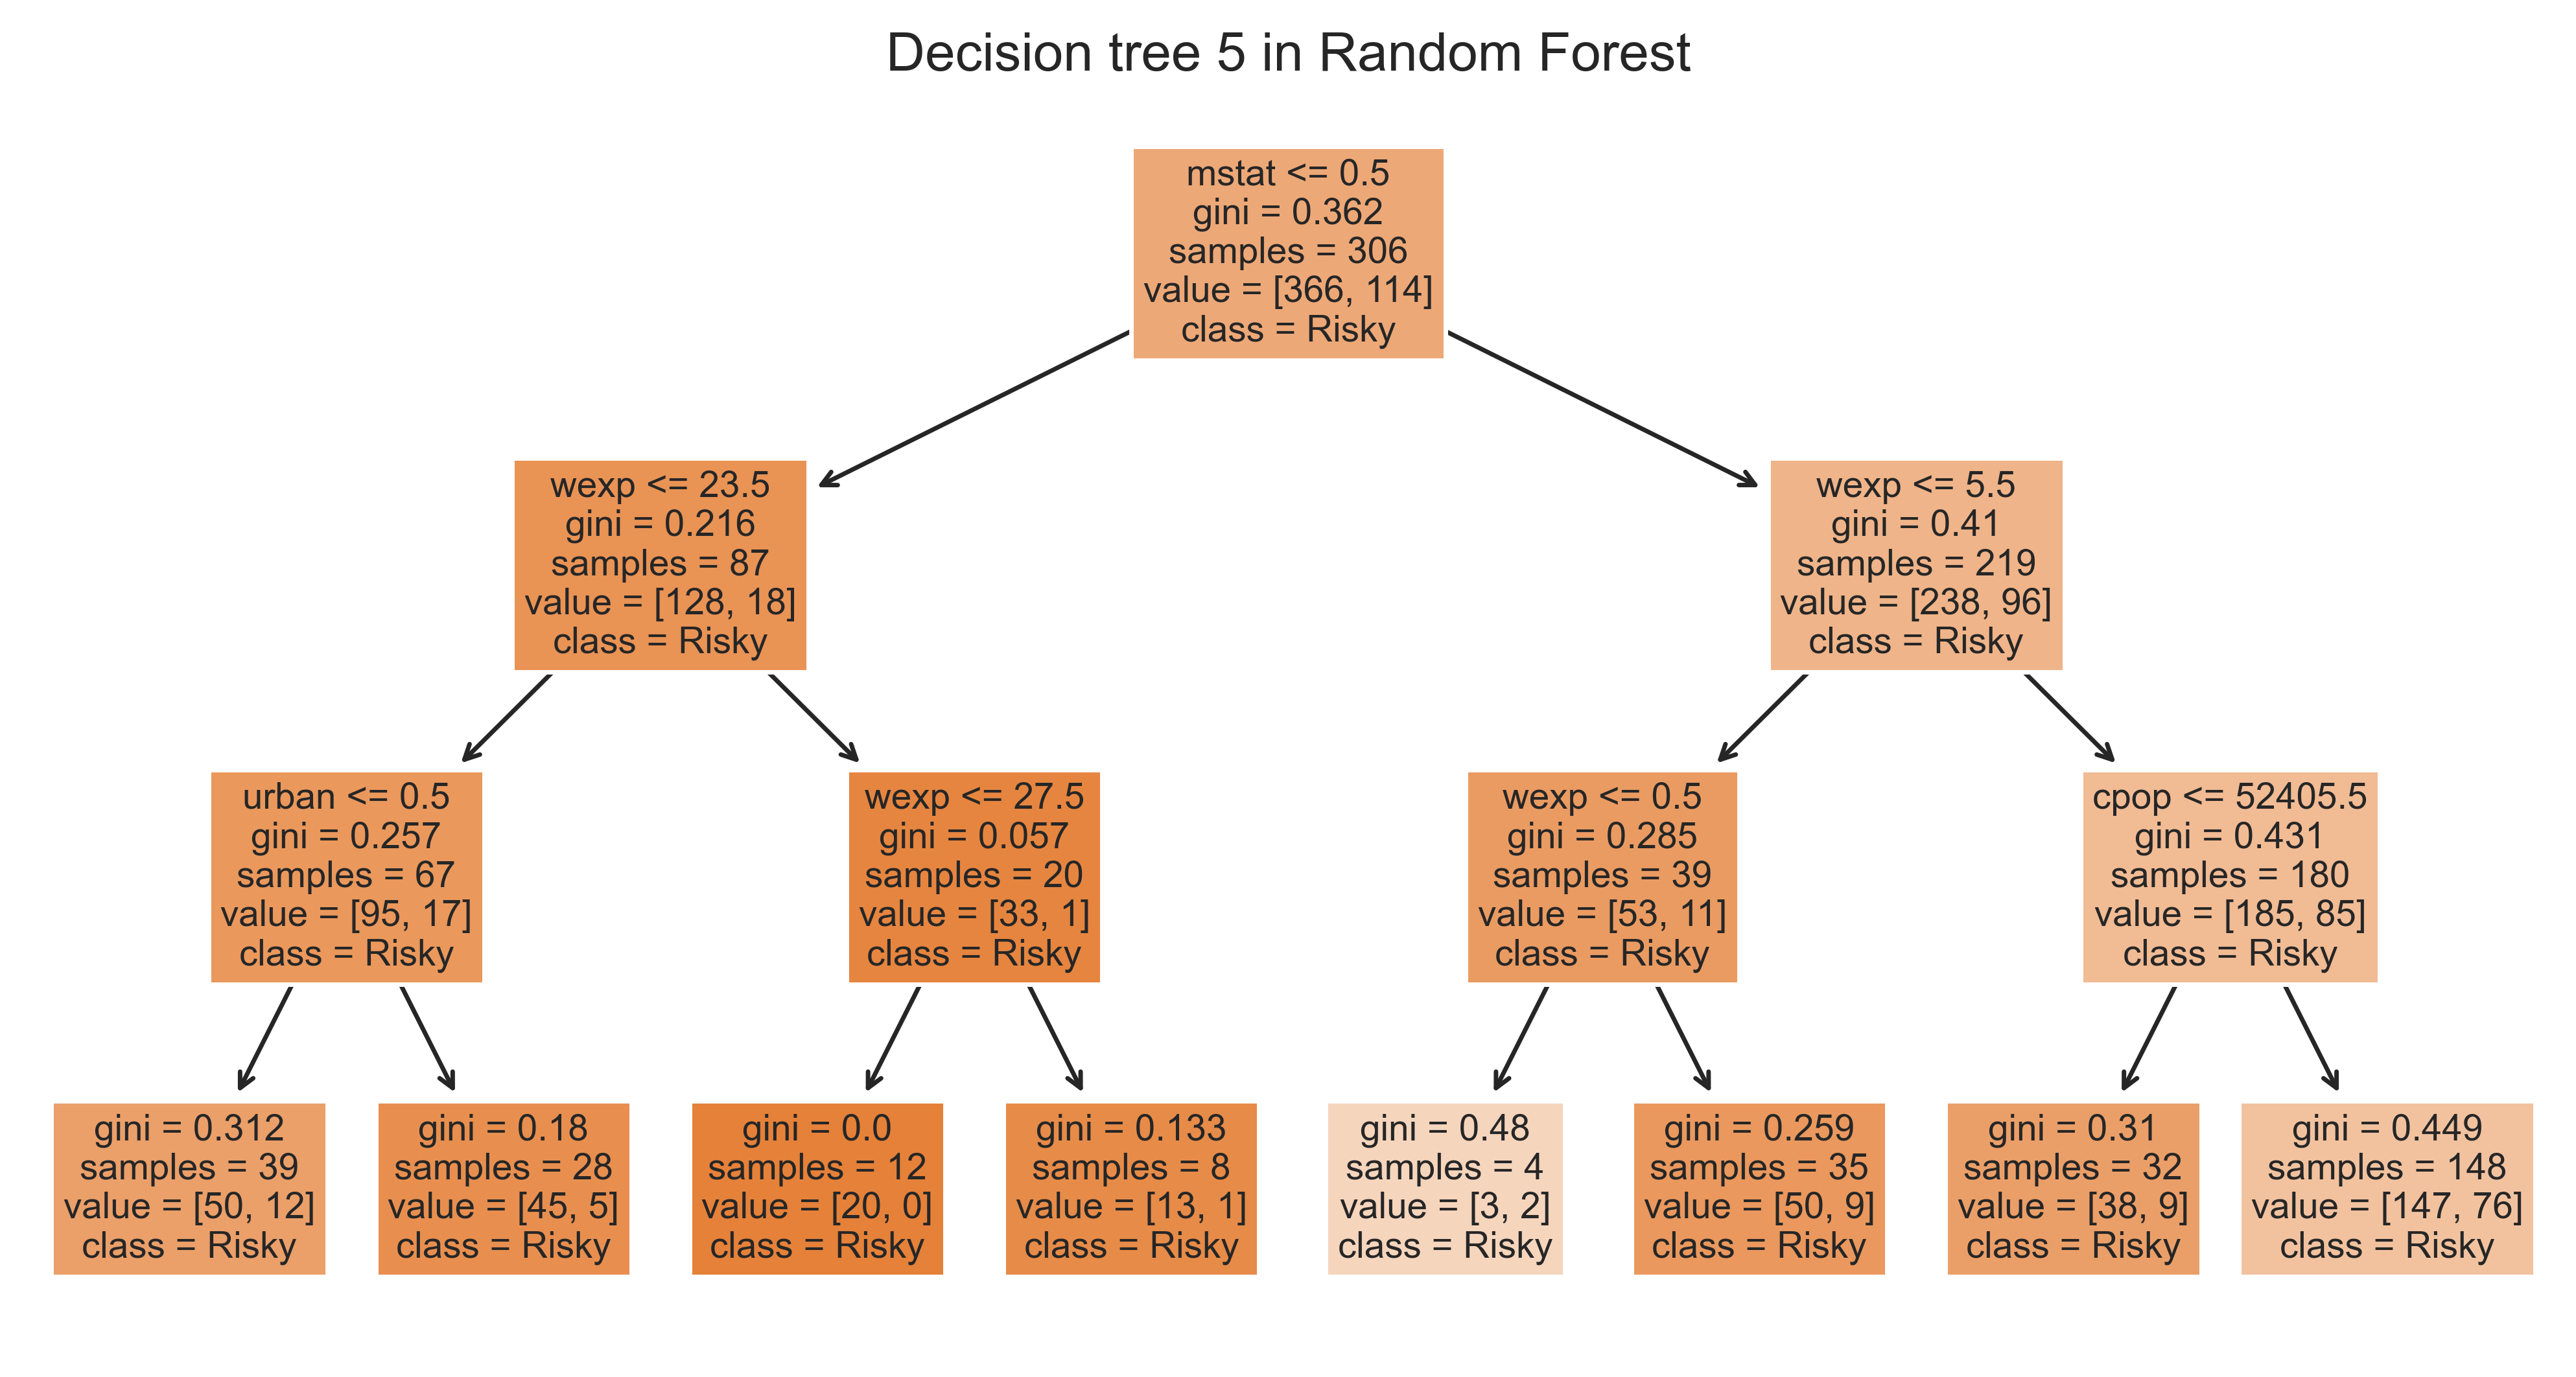

In [84]:
for i in range (5):
    tree.plot_tree(rfc.estimators_[i] , feature_names=['ugrad', 'mstat', 'cpop', 'wexp', 'urban'] , class_names=['Risky' , 'Good'] , filled= True
                  )
    plt.title(f"Decision tree {i + 1} in Random Forest")
    plt.show()